# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython
%R require(movMF)

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True
mpl.rcParams['legend.handlelength'] = 1.8

In [2]:
pdf_fig_size=(3.5, 2.5)

## 1.2 Read Data

In [3]:
# file_path, bandwidth= './data/NCDC/europe/uk/marham/dat.txt', 1.7
# file_path, bandwidth= './data/NCDC/europe/uk/tiree/dat.txt', 1.9
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NCDC/europe/uk/boscombe_down/dat.txt', 1.5, 4
# file_path, bandwidth= './data/NCDC/europe/uk/middle_wallop/dat.txt', 1.3
# file_path, bandwidth= './data/NCDC/europe/uk/bournemouth/dat.txt',1.3 # 4?
# file_path= "./data/NCDC/europe/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/europe/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/europe/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/europe/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?
# file_path= './data/NCDC/europe/uk/southhamption/dat.txt' # high 0, trend

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/germany/landsberg_lech/dat.txt", 0.9, 4 
# file_path, bandwidth= "./data/NCDC/europe/germany/neuburg/dat.txt", 0.7
# file_path, bandwidth= "./data/NCDC/europe/germany/laupheim/dat.txt", 0.7 # double peak, 4?, trend
# file_path, bandwidth= './data/NCDC/europe/germany/niederstetten/dat.txt', 0.9 # get the peak
# file_path, bandwidth= "./data/NCDC/europe/germany/holzdorf/dat.txt", 0.9 # 2008 year
# file_path,  NUMBER_OF_GAUSSIAN= './data/NCDC/europe/france/nantes/dat.txt', 4 # unit shift, one direction deviate big
# file_path= './data/NCDC/europe/france/pau_pyrenees/dat.txt'# unit shift, 2; 
# file_path= "./data/NCDC/europe/france/avord/dat.txt" # try 4, initial speed (should be good with m/s), incompete dataset
# file_path= "./data/NCDC/europe/france/vatry/dat.txt"  # double peak, initial speed, incompete dataset
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= "./data/NCDC/europe/spain/valladolid/dat.txt", 1.1, 4
# file_path= './data/NCDC/europe/spain/jerez/dat.txt' # high 0
# file_path, bandwidth= "./data/NCDC/europe/spain/barayas/dat.txt", 0.7 # not good fit
# file_path, bandwidth= './data/NCDC/europe/spain/malaga/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/tenerife_sur/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/almeria/dat.txt', 0.7 # negative dimensions?
# file_path, bandwidth= './data/NCDC/europe/greece/eleftherios_intl/dat.txt',0.7 # some direction might be blocked
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?; time irregular
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# MidEast
# file_path= './data/NCDC/mideast/uae/al_maktoum/dat.txt'
# file_path= './data/NCDC/mideast/uae/sharjah_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/dubai_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/uae/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/buraimi/dat.txt' # not good dataset
# file_path= './data/NCDC/mideast/turkey/konya/dat.txt' 
# file_path= './data/NCDC/mideast/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/bartin/dat.txt' # bad dataset

# file_path, bandwidth = "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt", 0.6
# file_path, bandwidth= "./data/NCDC/cn/shanghai/pudong/dat.txt", 0.8
# file_path, bandwidth= "./data/NCDC/cn/hefei_luogang/dat.txt", 0.6 # few 0, trend
# file_path, bandwidth= "./data/NCDC/cn/nanjing_lukou/dat.txt", 0.5
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0
# file_path= './data/NCDC/cn/gaoqi/dat.txt' 

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path, bandwidth= "./data/NCDC/oceania/auckland_intl/dat.txt", 0.9  # Good data, double mode
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path, bandwidth= "./data/NCDC/oceania/canberra/dat.txt", 0.7 # high 0, bad fit
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/oceania/horsham/dat.txt', 0.9, 4 # get the peak

# file_path, bandwidth= './data/NCDC/us/boston_16nm/dat.txt', 0.9 # Offshore, mixed type

# file_path= './data/NCDC/europe/senj/dat.txt' # Bad dir, may be update in recent years?
# file_path= 'D:/data/NCDC/altdorf/dat.txt' 
# file_path= 'D:/data/NCDC/san_fran_bay_reserve/dat.txt'
# file_path= 'D:/data/NCDC/veracurz_harbor/dat.txt', # Dir problem
# file_path= 'D:/data/NCDC/leninogorsk/dat.txt', # Bad dir

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/minneapolis_MN/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN  = './data/asos/bismarck_ND/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/aberdeen_SD/hr_avg.csv', 1.7, 2 # only to 2012
# file_path, bandwidth = './data/asos/lincoln_NE/hr_avg.csv', 0.9
# file_path, bandwidth = './data/asos/des_moines_IA/hr_avg.csv', 1.3
# file_path, bandwidth = './data/asos/springfield_IL/hr_avg.csv', 1.1 
# file_path, bandwidth = './data/asos/denver/hr_avg.csv', 1.3
# file_path= 'D:/data/asos/olympia_WA/hr_avg.csv'
# file_path= 'D:/data/asos/olympia_WA/minute_avg.csv'
# file_path= 'D:/data/asos/topeka_KS/hr_avg.csv' # High 0
# file_path, bandwidth = 'D:/data/asos/topeka_KS/minute_avg.csv', 0.9 

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NDAWN/baker/hr_avg.csv', 0.7, 4 
# file_path, bandwidth = './data/NDAWN/dickinson/hr_avg.csv', 0.6
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

# file_path= 'data/ECMWF/yemen/13N42E/dat.csv'
# file_path= 'data/ECMWF/spain/28N16W/dat.csv'
# file_path= 'data/ECMWF/usa/56N88W/dat.csv'
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= 'data/ECMWF/usa/38N122W/dat.csv', 0.7, 4
# file_path= 'data/ECMWF/usa/47N123W/dat.csv'
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = 'data/ECMWF/usa/47N123W/dat.csv', 0.4, 4 #good
# file_path = 'D:/ECMWF/8N68W/dat.csv' 
# file_path = 'D:/ECMWF/9N68W/dat.csv' 
# file_path, NUMBER_OF_GAUSSIAN  = 'data/ECMWF/germany/49N9E/dat.csv', 4 # good
# file_path= 'd:/data/ECMWF/28.5N16.5W/dat.csv' # Tenerife

file_path, bandwidth = 'data/ECMWF/usa/48.75N98.25W/dat.csv', 0.8# Olga, good accordance; might have overfitting problem in 4
# file_path, bandwidth= 'data/ECMWF/venezuela/8N67W/dat.csv', 0.3 # good, but the data might be problematic.
# file_path, bandwidth = 'data/ECMWF/chile/52S75W/dat.csv', 1.1 # good
# file_path, bandwidth = 'data/ECMWF/iceland/65N17W/dat.csv', 1.1 # good
# file_path, bandwidth= 'data/ECMWF/sudan/18N32E/dat.csv', 0.5 # good, good for angular linear
# file_path, NUMBER_OF_GAUSSIAN, bandwidth= 'data/ECMWF/china/20N120E/dat.csv', 2, 1.1 # China East Sea
# file_path, NUMBER_OF_GAUSSIAN, bandiwdth = 'data/ECMWF/australia/37S142E/dat.csv', 5, 0.5

# file_path, NUMBER_OF_GAUSSIAN, bandwidth= 'data/portus/cabo_de_gata/dat.csv', 4, 0.7 # need to remove 0 speed
# file_path = 'd:/data/portus/alboran/dat.csv' # problem data

# USA Comparison
# file_path = 'd:/data/ECMWF/47.25N102.75W/dat.csv' # Green R, good accordance
# file_path= 'd:/data/ECMWF/48N103W/dat.csv' # Ray W, bag accordance

# Comparison with On the select of ...
# file_path= 'data/ECMWF/greece/38N25E/dat.csv' # Andors, good accordance, good
# file_path= 'D:/data/ECMWF/36N25E/dat.csv' # Crete, bad accordance
# file_path= 'D:/data/ECMWF/37N22E/dat.csv' # Pylos, general good accordance
# file_path= 'data/ECMWF/greece/38N25E/dat.csv' # Zak, bad accordance
# file_path= 'D:/data/ECMWF/36.75N2.25W/dat.csv' # Cabo de Gata, general good accordance
# file_path= 'data/ECMWF/portugal/36N5W/dat.csv' # Mar de Alboran, bad accordance

# US offshore
# file_path = 'D:/data/NDBC/46086/10_min.csv' # strong directionality
# file_path = 'D:/data/NDBC/42057/10_min.csv' # strong directionality
# file_path = 'D:/data/NDBC/46014/10_min.csv' # strong directionality, too weird
# file_path = 'D:/data/NDBC/cdrf1/10_min.csv' 
# file_path = 'D:/data/NDBC/46081/10_min.csv'  # strong directionality
# file_path = 'D:/data/NDBC/44013/10_min.csv' 

# file_path = 'D:/data/ECMWF/32N118W/dat.csv' #46086
# file_path = 'D:/data/ECMWF/17N81W/dat.csv' # 42057
# file_path = 'D:/data/ECMWF/39N124W/dat.csv' # 46014
# file_path = 'D:/data/ECMWF/29N83W/dat.csv' #cdrf1
# file_path = 'D:/data/ECMWF/61N148W/dat.csv' #46081, big difference with NDBC
# file_path = 'D:/data/ECMWF/42N71W/dat.csv' #44013

In [4]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type']]
    integer_data = True
    detect_sample_time = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False
    convert_to_knot = False
elif 'asos' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False # may have some problem
    knot_unit = True
    convert_to_knot = False
elif 'NDBC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False
    convert_to_knot = False
    BIN_WIDTH=0.5
elif 'portus' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df['time']=pd.to_datetime(df['time'])
    df['date']=df['time'].dt.strftime('%Y%m%d').astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    integer_data = False
    convert_to_knot = False
    BIN_WIDTH=0.5
else:
    # ECMWF
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df.rename(columns={'U':'x','V':'y'}, inplace=True)
    df.x, df.y=-df.x, -df.y
    df['speed']=np.sqrt(df.x**2+df.y**2)
    df['dir']=np.degrees(np.arctan2(df.y, df.x))%360
    df['time']=pd.to_datetime('1979-01-01T00:00:00Z')+pd.to_timedelta(df['time'], unit='h')
    df['date']=df['time'].dt.strftime('%Y%m%d').astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    integer_data = False
    cartesian = True
    convert_to_knot = False
    BIN_WIDTH=0.5

In [5]:
df.dropna(subset=['dir','speed'], inplace=True)
if 'knot_unit' not in globals():
    knot_unit = False
if 'cartesian' not in globals():
    cartesian = False
if not {'type', 'wind_type'}.issubset(df.columns):
    df['type']='default'
    df['wind_type']='default'
if 'detect_sample_time' not in globals():
    detect_sample_time = False
if 'BIN_WIDTH' not in globals():
    BIN_WIDTH = 1
df.head()

time        lat     lon         x         y     speed  \
0 1979-01-01 00:00:00  48.750004  261.75 -6.007003 -1.468434  6.183881   
1 1979-01-01 06:00:00  48.750004  261.75 -5.749926 -0.236968  5.754807   
2 1979-01-01 12:00:00  48.750004  261.75 -4.950674 -0.303665  4.959978   
3 1979-01-01 18:00:00  48.750004  261.75 -5.490054  1.950379  5.826206   
4 1979-01-02 00:00:00  48.750004  261.75 -3.863687  3.476271  5.197358   

          dir      date  HrMn     type wind_type  
0  193.736770  19790101  0000  default   default  
1  182.359959  19790101  0600  default   default  
2  183.510019  19790101  1200  default   default  
3  160.442068  19790101  1800  default   default  
4  138.021369  19790102  0000  default   default

In [6]:
if 'NCDC' in file_path:
    lat, long = get_lat_long(file_path)
    print(lat,long)
    map_osm = folium.Map(location=[lat, long], zoom_start=4)
    folium.Marker([lat, long]).add_to(map_osm)
    display(map_osm)

In [7]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 99) ")['1970':'2016']

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


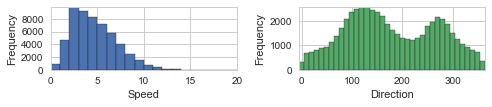

In [8]:
plot_speed_and_angle_distribution(df.speed, df.dir)

lat       lon             x             y         speed  \
count  5.552000e+04  55520.00  55520.000000  55520.000000  55520.000000   
mean   4.875000e+01    261.75     -1.023136      0.403814      4.729708   
std    3.152707e-11      0.00      3.186055      4.093201      2.396789   
min    4.875000e+01    261.75    -17.779930    -14.095932      0.065852   
25%    4.875000e+01    261.75     -2.997665     -2.488354      2.839346   
50%    4.875000e+01    261.75     -0.967118      0.583280      4.370591   
75%    4.875000e+01    261.75      1.197744      3.251902      6.225724   
max    4.875000e+01    261.75     11.594738     18.637878     19.479633   

                dir          date          HrMn  dir_windrose  
count  55520.000000  5.552000e+04  55520.000000  55520.000000  
mean     178.830542  1.997567e+07    900.000000    209.142080  
std       89.791404  1.096640e+05    670.826435    105.171154  
min        0.003026  1.979010e+07      0.000000      0.012248  
25%      108.565887  1.988070e+07    450.000000    138.823232  
50%      165.845953  1.997567e+07    900.000000    217.278887  
75%      259.333867  2.007070e+07   1350.000000    303.251672  
max      359.991104  2.016123e+07   1800.000000    359.997332

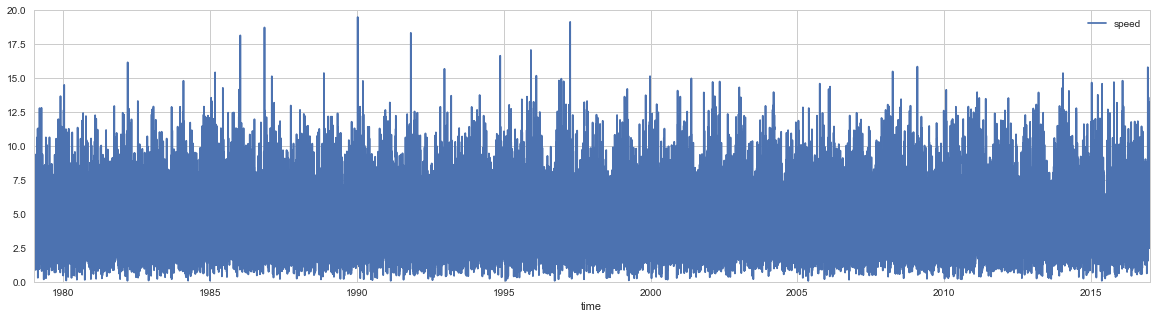

In [9]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
# Convert Windrose coordianates to Polar Cooridinates 
if cartesian == True:
    df['dir_windrose'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
else:
    df['dir_windrose'] = df['dir']
    df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
display(df.describe())
df.plot(y='speed',legend=True,figsize=(20,5))

In [10]:
if "portus" in file_path: 
    df = df.query('speed >0 ')
    N_VM_DIR, N_VM_PHI = 5, 2
else:
    N_VM_DIR, N_VM_PHI = 4, 3

## 1.3 General Data Info

### 1.3.1 Unit Detection

False


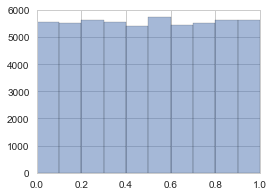

In [11]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))

if 'convert_to_knot' not in globals():
    convert_to_knot = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    
if convert_to_knot:
    knot_unit = True
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    if integer_data:
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [12]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
    bare_speed_unit_text = ' knot'
    dir_power_density_unit=''
    speed_power_density_unit=''
else: 
    speed_unit_text = ' (m/s)'
    bare_speed_unit_text = ' m/s'
    dir_power_density_unit=' (W/(m$^2$rad))'
    speed_power_density_unit=' (W/(m$^3$/s))'

### 1.3.2 Sampling Type Selection

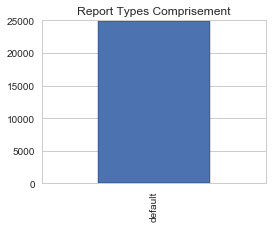

In [13]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

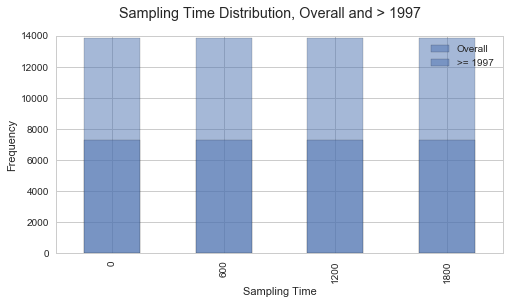

In [14]:
MID_YEAR = int(np.average(df.index.year))

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df[str(MID_YEAR):]['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='>= %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

In [15]:
if detect_sample_time:
    df['sample_time'] = df.HrMn % 100 
    sample_time = df['2000':]['sample_time']
    sample_times = sample_time.value_counts()[sample_time.value_counts() > 1000]
    sample_times = sample_times.index.tolist()
    df = df.query("sample_time == @sample_times[0]")
    df.drop(['sample_time'], 1,inplace=True)
    print(sample_times)

    df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))
else:
    sample_times = 'Default'

## 1.4 Error Data handling and Adjustment

### 1.4.1 Artefacts

wrong direction record

In [16]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

sudden increase in speed

lat     lon          x          y      speed  \
time                                                                      
1990-01-11 00:00:00  48.750004  261.75 -17.779930   7.958027  19.479633   
1997-04-06 12:00:00  48.750004  261.75  -4.277940  18.637878  19.122533   
1986-11-08 18:00:00  48.750004  261.75  -4.474408  18.172195  18.714940   
1991-11-02 18:00:00  48.750004  261.75  -6.707623  17.043182  18.315629   
1986-01-12 00:00:00  48.750004  261.75 -17.087730   6.062214  18.131215   
1986-01-12 06:00:00  48.750004  261.75 -13.533293  11.584434  17.814296   
1997-04-06 06:00:00  48.750004  261.75  -0.293014  17.183838  17.186336   
1995-12-05 06:00:00  48.750004  261.75 -16.719627   3.378800  17.057615   
1986-11-09 00:00:00  48.750004  261.75  -6.050271  15.929230  17.039547   
1997-04-06 18:00:00  48.750004  261.75  -8.313403  14.840424  17.010316   

                            dir      date  HrMn     type wind_type  \
time                                                                 
1990-01-11 00:00:00  155.887435  19900111     0  default   default   
1997-04-06 12:00:00  102.927150  19970406  1200  default   default   
1986-11-08 18:00:00  103.832373  19861108  1800  default   default   
1991-11-02 18:00:00  111.482928  19911102  1800  default   default   
1986-01-12 00:00:00  160.466842  19860112     0  default   default   
1986-01-12 06:00:00  139.436633  19860112   600  default   default   
1997-04-06 06:00:00   90.976896  19970406   600  default   default   
1995-12-05 06:00:00  168.575199  19951205   600  default   default   
1986-11-09 00:00:00  110.797876  19861109     0  default   default   
1997-04-06 18:00:00  119.256954  19970406  1800  default   default   

                     dir_windrose     incre  incre_reverse  
time                                                        
1990-01-11 00:00:00    294.112565  5.992479       2.604981  
1997-04-06 12:00:00    347.072850  1.936197       2.112217  
1986-11-08 18:00:00    346.167627  2.116829       1.675394  
1991-11-02 18:00:00    338.517072  5.434352       6.738152  
1986-01-12 00:00:00    289.533158  1.644122       0.316919  
1986-01-12 06:00:00    310.563367 -0.316919       2.973535  
1997-04-06 06:00:00    359.023104  3.444777      -1.936197  
1995-12-05 06:00:00    281.424801  8.543028       0.263885  
1986-11-09 00:00:00    339.202124 -1.675394       3.948616  
1997-04-06 18:00:00    330.743046 -2.112217       4.005011

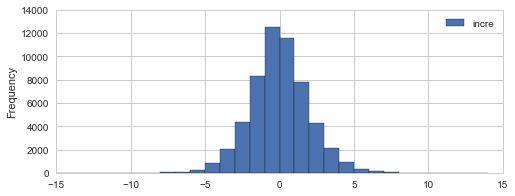

In [17]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [18]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')
print('sudden decrease number', len(df.query('(incre < -@incre_threshold )&(incre_reverse < -@incre_threshold )')))
df = df.query('(incre > -@incre_threshold )|(incre_reverse > -@incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 0
sudden decrease number 0


lat     lon          x          y      speed  \
time                                                                      
1990-01-11 00:00:00  48.750004  261.75 -17.779930   7.958027  19.479633   
1997-04-06 12:00:00  48.750004  261.75  -4.277940  18.637878  19.122533   
1986-11-08 18:00:00  48.750004  261.75  -4.474408  18.172195  18.714940   
1991-11-02 18:00:00  48.750004  261.75  -6.707623  17.043182  18.315629   
1986-01-12 00:00:00  48.750004  261.75 -17.087730   6.062214  18.131215   
1986-01-12 06:00:00  48.750004  261.75 -13.533293  11.584434  17.814296   
1997-04-06 06:00:00  48.750004  261.75  -0.293014  17.183838  17.186336   
1995-12-05 06:00:00  48.750004  261.75 -16.719627   3.378800  17.057615   
1986-11-09 00:00:00  48.750004  261.75  -6.050271  15.929230  17.039547   
1997-04-06 18:00:00  48.750004  261.75  -8.313403  14.840424  17.010316   

                            dir      date  HrMn     type wind_type  \
time                                                                 
1990-01-11 00:00:00  155.887435  19900111     0  default   default   
1997-04-06 12:00:00  102.927150  19970406  1200  default   default   
1986-11-08 18:00:00  103.832373  19861108  1800  default   default   
1991-11-02 18:00:00  111.482928  19911102  1800  default   default   
1986-01-12 00:00:00  160.466842  19860112     0  default   default   
1986-01-12 06:00:00  139.436633  19860112   600  default   default   
1997-04-06 06:00:00   90.976896  19970406   600  default   default   
1995-12-05 06:00:00  168.575199  19951205   600  default   default   
1986-11-09 00:00:00  110.797876  19861109     0  default   default   
1997-04-06 18:00:00  119.256954  19970406  1800  default   default   

                     dir_windrose     incre  incre_reverse  
time                                                        
1990-01-11 00:00:00    294.112565  5.992479       2.604981  
1997-04-06 12:00:00    347.072850  1.936197       2.112217  
1986-11-08 18:00:00    346.167627  2.116829       1.675394  
1991-11-02 18:00:00    338.517072  5.434352       6.738152  
1986-01-12 00:00:00    289.533158  1.644122       0.316919  
1986-01-12 06:00:00    310.563367 -0.316919       2.973535  
1997-04-06 06:00:00    359.023104  3.444777      -1.936197  
1995-12-05 06:00:00    281.424801  8.543028       0.263885  
1986-11-09 00:00:00    339.202124 -1.675394       3.948616  
1997-04-06 18:00:00    330.743046 -2.112217       4.005011

### 1.4.2 Direction re-aligment 
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,50 ...], need to redistribute the angle into 22.5, e.g. [0, 22.5, 45...]

In [19]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if 'SECTOR_LENGTH' not in globals():
    if integer_data:
        SECTOR_LENGTH = 360/len(effective_column) 
    else: 
        SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0.003026      1
0.024999      1
0.043512      1
0.095594      1
0.101178      1
0.152644      1
0.159109      1
0.164975      1
0.174803      1
0.184286      1
0.184784      1
0.189856      1
0.194780      1
0.197551      1
0.202469      1
0.226156      1
0.239702      1
0.242288      1
0.257882      1
0.258034      1
0.266782      1
0.275204      1
0.284157      1
0.301771      1
0.312160      1
0.313661      1
0.335668      1
0.339468      1
0.345943      1
0.422797      1
             ..
359.648288    1
359.692081    1
359.704991    1
359.709218    1
359.713566    1
359.726712    1
359.742328    1
359.750869    1
359.764612    1
359.779436    1
359.781165    1
359.804539    1
359.811885    1
359.815428    1
359.823268    1
359.827777    1
359.834705    1
359.842399    1
359.849495    1
359.850159    1
359.858650    1
359.874073    1
359.881292    1
359.899789    1
359.964413    1
359.969737    1
359.976378    1
359.981613    1
359.984731    1
359.991104    1
Name: dir, Length: 55520

0 10


In [20]:
if integer_data:
    df=realign_direction(df, effective_column)

### 1.4.3 0 Speed

In [21]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df['2005':])
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.0155144877937


Series([], Name: speed, dtype: int64)


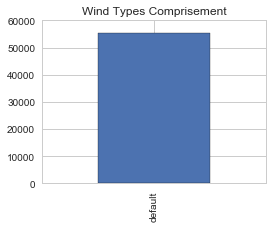

In [22]:
print(df.query('dir == 999')['speed'].value_counts())
df=fill_direction_999(df, SECTOR_LENGTH, integer_data)

## 1.5 Time Shift Comparison

In [23]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [lat, lon, x, y, speed, dir, date, HrMn, type, wind_type, dir_windrose]
Index: []

1979 - 1980


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


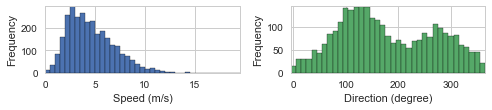

1981 - 1985


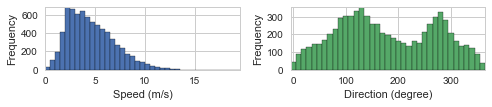

1986 - 1990


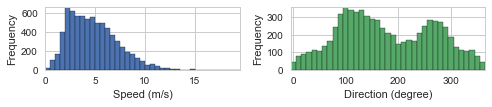

1991 - 1995


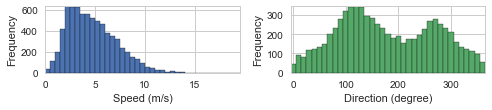

1996 - 2000


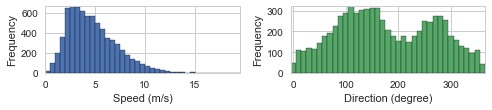

2001 - 2005


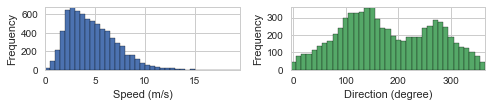

2006 - 2010


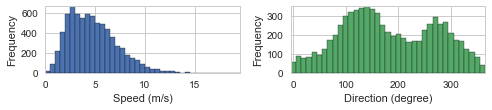

2011 - 2015


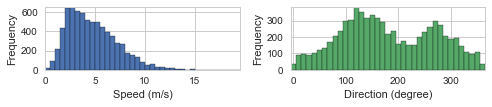

2016 - 2016


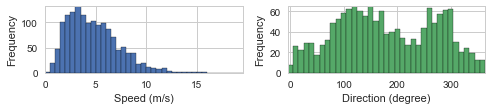

In [24]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text, bin_width=BIN_WIDTH)

(0, 7.0)

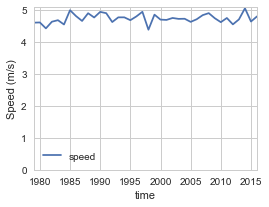

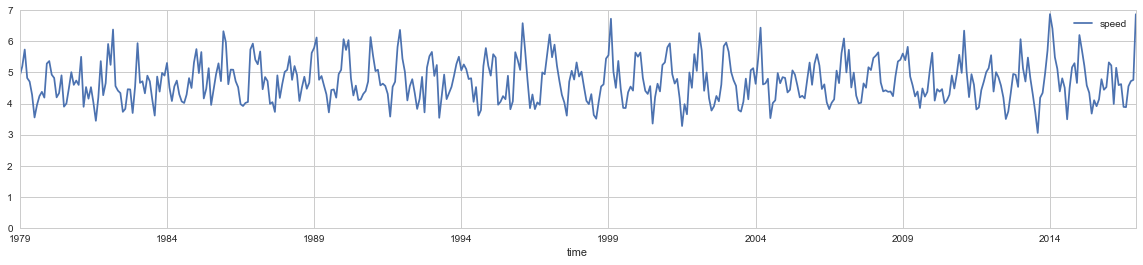

In [25]:
df.resample('A').mean().plot(y='speed', figsize=(4,3))
plt.gca().set_ylim(bottom=0)
plt_configure(ylabel="Speed"+speed_unit_text)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [26]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+BIN_WIDTH, BIN_WIDTH)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares, years = [], []
    for year in arange(1980, 2016):
        sub_df = df[str(year-1):str(year+1)]
        if len(sub_df) > 1000:
            current_density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            R_square = sector_r_square(density_all, current_density)
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUwAAADECAYAAAD0+hheAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAF6lJREFUeJzt3X9Q0/f9B/DnJ0AQk6Clnbvdl9IBJXc6j5Ufo+15Yv2u
Lb3NVms1NnG4ndqv5Xo6uBWDCqKHU7mVdMMrq2z0tgsFxrRbN/er0zm4Q8p1n862ooxbvo47tbWI
tSYRgg3v7x898jVNTD5APiHg83HXu/p+vwOvzyfhSfL5vN9vJCGEABERhaWZ7gKIiGYKBiYRkUIM
TCIihRiYREQKMTCJiBRiYBIRKRSvZNDTTz8NvV4PAEhNTcXzzz+PiooKSJKErKwsVFdXQ6PRoL29
HW1tbYiPj0dJSQmWL1+OkZERlJeXY2hoCDqdDrW1tUhJSVH1oIiIVCHCGBkZEStXrvRr27Jli3j7
7beFEEJUVVWJt956S3z88cdixYoVwuPxiOvXr/v+/7XXXhP19fVCCCGOHTsmampqwn1LIqKYFPYj
eV9fH4aHh7Fx40Zs2LABp0+fRm9vLwoKCgAAhYWFOHXqFN5//33k5ORAq9XCYDAgLS0NfX19kGUZ
S5cu9Y3t7u5W9zcAEZFKwn4knzNnDjZt2oS1a9fiP//5D5577jkIISBJEgBAp9PB6XTC5XLBYDD4
HqfT6eByufzax8eGI8vyZI+HiCikvLy8ST82bGCmp6fjvvvugyRJSE9Px/z589Hb2+vrd7vdSE5O
hl6vh9vt9ms3GAx+7eNjlZjKQUVKf38/thw8Dv1d/xXQ5/rkIg5XPAqj0RiVWmRZjolzArCW22Et
wcVaLVMR9iP5kSNHcPDgQQDA5cuX4XK5sGTJEvT09AAAOjs7kZ+fj+zsbMiyDI/HA6fTCYfDAaPR
iNzcXHR0dPjGxsqJG+f1etHf3x/0v/Pnz093eUQUQ8K+w1yzZg127NgBs9kMSZKwf/9+3HXXXaiq
qoLNZkNGRgaKiooQFxeH4uJiWCwWCCFQVlaGxMREmM1mWK1WmM1mJCQkoK6uLhrHpZjD4UDxjhbM
nbcgoG/owjncnbpwGqoiolgUNjC1Wm3QkGtubg5oM5lMMJlMfm1JSUmor6+fQonqmztvQdCP3Tc+
vTwN1RBRrOLEdSIihRiYREQKMTCJiBRiYBIRKcTAJCJSSNHmGxRIjI2FnKeZmZmJuLi4KFZERGpj
YE7SsHMQuxuvYO48R0DfjU8/hv2AJWqrgIgoOhiYU3C7+ZtENDvxGiYRkUIMTCIihfiRXAW8IUQ0
OzEwVcAbQkSzEwNTJbwhRDT78BomEZFCDEwiIoUYmERECjEwiYgUYmASESnEwCQiUojTiqIs1KR2
Tmgnim0MzCi73aR2Tmgnin0MzGnASe1EMxOvYRIRKcR3mDEi3IYdXq83itUQUTAMzBgRbsMO6/ps
FBQUTENlRDROUWAODQ1h9erVeO211xAfH4+KigpIkoSsrCxUV1dDo9Ggvb0dbW1tiI+PR0lJCZYv
X46RkRGUl5djaGgIOp0OtbW1SElJUfuYZixe2ySKbWGvYd68eRO7d+/GnDlzAAAHDhxAaWkpWlpa
IITAiRMnMDg4CLvdjra2NjQ1NcFms2F0dBStra0wGo1oaWnBqlWr0NDQoPoBERGpJew7zNraWjz7
7LNobGwEAPT29vo+GhYWFqKrqwsajQY5OTnQarXQarVIS0tDX18fZFnG5s2bfWMnEpiyLE/meCZs
YGAgKt8nEqJ1TpRgLcGxluBiqZapCBmYb7zxBlJSUrB06VJfYAohIEkSAECn08HpdMLlcsFgMPge
p9Pp4HK5/NrHxyqVl5c34YOZDIPBABz7KCrfa6qidU7CkWWZtQTBWoKLtVqmImRgHj16FJIkobu7
G+fOnYPVasXVq1d9/W63G8nJydDr9XC73X7tBoPBr318LBHRTBXyGubrr7+O5uZm2O12LFy4ELW1
tSgsLERPTw8AoLOzE/n5+cjOzoYsy/B4PHA6nXA4HDAajcjNzUVHR4dvbKz8liEimowJTyuyWq2o
qqqCzWZDRkYGioqKEBcXh+LiYlgsFgghUFZWhsTERJjNZlitVpjNZiQkJKCurk6NYyAiigrFgWm3
233/39zcHNBvMplgMpn82pKSklBfXz+F8oiIYgeXRhIRKcTAJCJSiEsjZwAxNoZLly6hv78/aD/3
0SSKDgbmDDDsHIT9pISj7x4P6OM+mkTRw8CcIbjOnGj68RomEZFCDEwiIoUYmERECjEwiYgUYmAS
ESnEu+QzXLi/BcQ5mkSRw8Cc4cL9LSDO0SSKHAbmLMA5mkTRwWuYREQKMTCJiBRiYBIRKcTAJCJS
iIFJRKQQA5OISCEGJhGRQgxMIiKFGJhERAoxMImIFLojlkZ6vV44HIFrrQGE3LhipuPGHESRFTYw
vV4vKisrcf78eUiShL179yIxMREVFRWQJAlZWVmorq6GRqNBe3s72traEB8fj5KSEixfvhwjIyMo
Ly/H0NAQdDodamtrkZKSEo1j83E4HCje0YK58xYE9A1dOIe7UxdGtZ5o4cYcRJEVNjBPnjwJAGhr
a0NPTw9efvllCCFQWlqKBx98ELt378aJEyfwwAMPwG634+jRo/B4PLBYLFiyZAlaW1thNBqxdetW
/OEPf0BDQwMqKytVP7Avut0GFTc+vRz1WqKJG3MQRU7YwHz00UfxyCOPAAAuXbqE5ORknDp1CgUF
BQCAwsJCdHV1QaPRICcnB1qtFlqtFmlpaejr64Msy9i8ebNvbENDg3pHQ0SkIkXXMOPj42G1WvHX
v/4V9fX16OrqgiRJAACdTgen0wmXywWDweB7jE6ng8vl8msfH6uELMsTPZbbGhgYiNjXmk3OnDmj
+Pn4okg+P1PFWoJjLZGn+KZPbW0tXnzxRZhMJng8Hl+72+1GcnIy9Ho93G63X7vBYPBrHx+rRF5e
ntLSwjIYDMCxjyL29WaLxYsXT+oapizLEX1+poK1BMdagptqcIedVvTb3/4Whw8fBgAkJSVBkiQs
XrwYPT09AIDOzk7k5+cjOzsbsizD4/HA6XTC4XDAaDQiNzcXHR0dvrGxcuKIiCYq7DvMxx9/HDt2
7MD69evx2WefYefOncjMzERVVRVsNhsyMjJQVFSEuLg4FBcXw2KxQAiBsrIyJCYmwmw2w2q1wmw2
IyEhAXV1ddE4LiKiiAsbmHPnzsVPfvKTgPbm5uaANpPJBJPJ5NeWlJSE+vr6KZRIRBQbuNKHiEgh
BiYRkUIMTCIihRiYREQKMTCJiBRiYBIRKXRHbO9Ggbj1G9HEMTDvUNz6jWjiGJh3MG79RjQxvIZJ
RKQQA5OISCEGJhGRQgxMIiKFGJhERAoxMImIFGJgEhEpxMAkIlKIgUlEpBADk4hIIQYmEZFCXEtO
AcLtZOT1eqNYDVHsYGBSgHA7GVnXZ6OgoGAaKiOaXgxMCoo7GREF4jVMIiKFGJhERAqF/Eh+8+ZN
7Ny5ExcvXsTo6ChKSkpw//33o6KiApIkISsrC9XV1dBoNGhvb0dbWxvi4+NRUlKC5cuXY2RkBOXl
5RgaGoJOp0NtbS1SUlKidWxERBEV8h3m7373O8yfPx8tLS34+c9/jpqaGhw4cAClpaVoaWmBEAIn
TpzA4OAg7HY72tra0NTUBJvNhtHRUbS2tsJoNKKlpQWrVq1CQ0NDtI6LiCjiQr7DfOKJJ1BUVAQA
EEIgLi4Ovb29vjukhYWF6OrqgkajQU5ODrRaLbRaLdLS0tDX1wdZlrF582bfWAYmEc1kIQNTp9MB
AFwuF7Zt24bS0lLU1tZCkiRfv9PphMvlgsFg8Hucy+Xyax8fq5QsyxM+mNsZGBiI2Neiz0Xy+Zkq
1hIca4m8sNO

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUsAAADECAYAAAAWJgMnAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGEhJREFUeJzt3X1MFHf+B/D3PrAUdxctP9PE/DgULBurm408xObCHS1J
FWPqaS+6uV2DSYEGuJ4e9MRFBNFAbInC3WGkT/H+WZTtRi49c+ZSK+lBgpY/5q4SsJy5DUeieC3S
B3e2sgjM74/+2DvKAsO6j/B+JSb6nVnnM1/Y9+7Md74zCkmSJBAR0YKUkS6AiCgWMCyJiGRgWBIR
ycCwJCKSgWFJRCQDw5KISAb1YitMTU2hpqYGQ0NDUCgUOHXqFOLj41FVVQWFQoH09HTU1dVBqVTC
6XTC4XBArVajrKwMeXl5GB8fR2VlJcbGxqDVatHY2IikpKRw7BsRUdAs+s3yk08+AQA4HA6Ul5fj
t7/9Ld58802Ul5fj0qVLkCQJnZ2dGB0dhd1uh8PhwIULF9Dc3IyJiQm0t7fDYDDg0qVL2Lt3L1pb
W0O+U0REwbboN8uXXnoJL774IgBgZGQEiYmJuHHjBrZt2wYAyM3NRU9PD5RKJTIyMqDRaKDRaJCS
koLBwUEIgoDi4mLfugxLIopFi4YlAKjVathsNnz88cdoaWlBT08PFAoFAECr1cLtdkMURej1et9r
tFotRFGc1T6z7mIEQQhkX4iIFpWVlRXQ62SFJQA0NjbiyJEjMJvN8Hq9vnaPx4PExETodDp4PJ5Z
7Xq9flb7zLpyBLpDwSYIQlTUEi11AKxlPqzFv2irJVCLnrP88MMP8e677wIAEhISoFAoYDQa0dvb
CwDo7u5GdnY2TCYTBEGA1+uF2+2Gy+WCwWBAZmYmurq6fOtGS6cRES3Fot8sd+zYgWPHjuHAgQOY
nJxEdXU1Nm7ciNraWjQ3NyMtLQ35+flQqVQoKCiA1WqFJEmoqKhAfHw8LBYLbDYbLBYL4uLi0NTU
FI79IiIKqkXDctWqVfj9738/p72trW1Om9lshtlsntWWkJCAlpaWJyiRiCjyeFE6EZEMDEsiIhkY
lkREMjAsiYhkYFgSEcnAsCQikoFhSUQkA8OSiEgGhiURkQwMSyIiGRiWREQyMCyJiGRgWBIRycCw
JCKSgWFJRCQDw5KISAaGJRGRDLIfWEaxZ2pqCi6Xa97lGzduhEqlCmNFRLGLYbmMuVwuFBy7hFWr
n5mz7Ltvv4T9TSsMBkMEKiOKPQuG5ePHj1FdXY179+5hYmICZWVlWLduHUpKSrBhwwYAgMViwa5d
u+B0OuFwOKBWq1FWVoa8vDyMj4+jsrISY2Nj0Gq1aGxsRFJSUjj2i/7fqtXPQPf0/0a6DKKYt2BY
XrlyBWvWrMGZM2fwzTffYO/evXj99dfx6quvorCw0Lfe6Ogo7HY7Ojo64PV6YbVakZOTg/b2dhgM
Bhw6dAhXr15Fa2srampqQr5TK8lCh9pDQ0NhroZo+VowLHfu3In8/HwAgCRJUKlU6O/vx9DQEDo7
O7F+/XpUV1ejr68PGRkZ0Gg00Gg0SElJweDgIARBQHFxMQAgNzcXra2tod+jFWahQ+2xu5/jf5Kf
i0BVRMvPgmGp1WoBAKIo4vDhwygvL8fExAT2798Po9GIt99+G+fPn8emTZug1+tnvU4URYii6GvX
arVwu92yCxMEIZD9CYloqcVfHcPDw/Mean/37Rfz/l/S9DSuXbuG/v5+v8uTk5MXHPyJlj4BWMt8
WEtwLTrAc//+fbz++uuwWq3YvXs3Hj58iMTERADA9u3bUV9fj+zsbHg8Ht9rPB4P9Ho9dDqdr93j
8fheJ0dWVtZS9yUkBEGIeC1TU1P405/+BKPROGfZzAfaUj1yj8L+iQKrVs+9euz7wR/jvIM/0dAn
M1iLf6zFvycJ7QXD8sGDBygsLMSJEyfw4x//GABQVFSE2tpamEwm3Lx5E1u2bIHJZMLvfvc7eL1e
TExMwOVywWAwIDMzE11dXTCZTOju7o6aDos1LpcLjRf7sGr1v+cse5JDbQ7+EMm3YFi+8847ePjw
IVpbW33nG6uqqnD69GnExcVh7dq1qK+vh06nQ0FBAaxWKyRJQkVFBeLj42GxWGCz2WCxWBAXF4em
pqaw7NRyFMihdqCk6ekFB4empqaCvk2iaLdgWNbU1PgdvXY4HHPazGYzzGbzrLaEhAS0tLQ8YYkU
bo/cozjx3gOsWj13lP27b7+E7YAJ27Zti0BlRJHDi9LJLx6iE83GueFERDIwLImIZGBYEhHJwLAk
IpKBAzy0JNL0NEZGRnDnzh2/y3nbN1quGJa0JDMzfzr+dn3OMt72jZYzhiUtGS8ropWI5yyJiGTg
N8sowftSEkU3hmWU4H0piaIbwzKKhPNmGRQd+FC52MGwJIogPlQudjAsiSKMVxfEBo6GExHJwLAk
IpKBYUlEJAPDkohIBoYlEZEMHA2noFnsQWcr9ZpBzs5aHhYMy8ePH6O6uhr37t3DxMQEysrK8Oyz
z6KqqgoKhQLp6emoq6uDUqmE0+mEw+GAWq1GWVkZ8vLyMD4+jsrKSoyNjUGr1aKxsRFJSUnh2jcK
s8UedLZSrxnk7KzlYcGwvHLlCtasWYMzZ87gm2++wd69e7Fp0yaUl5fj+eefx4kTJ9DZ2YmtW7fC
brejo6MDXq8XVqsVOTk5aG9vh8FgwKFDh3D16lW0trb6fVokLR+8ZtA/zs6KfQuG5c6dO5Gfnw8A
kCQJKpUKAwMDvseg5ubmoqenB0qlEhkZGdBoNNBoNEhJScHg4CAEQUBxcbFv3Zlnj8shCEKg+xR0
4ahleHg45NuItP7+frjd7qD/v9H+uxLoz1aansa1a9fQ39/vd3lycvKCpzWivV9izYJhqdVqAQCi
KOLw4cMoLy9HY2MjFAqFb7nb7YYoitDr9bNeJ4rirPaZdeXKyspa8s6EgiAIYalFr9cDf/53yLcT
SUajMeiH4eH6+cgxXy2B/mxnbrS8avXccdjvT2vM35+x0C+R8CShveho+P3793Hw4EHs2bMHu3fv
hlL5n5d4PB4kJiZCp9PB4/HMatfr9bPaZ9YlIvlmDt9/+Mff+U8KrQXD8sGDBygsLERlZSX27dsH
ANi8eTN6e3sBAN3d3cjOzobJZIIgCPB6vXC73XC5XDAYDMjMzERXV5dv3Wj5dCEiWqoFD8Pfeecd
PHz4EK2trb7zjcePH0dDQwOam5uRlpaG/Px8qFQqFBQUwGq1QpIkVFRUID4+HhaLBTabDRaLBXFx
cWhqagrLThERBduCYVlTU+N39LqtrW1Om9lshtlsntWWkJCAlpaWJyyRiCjyeFE6URBMTU1heHh4
1kDnDF54vjwwLMNsvtkcfEPFNpfLhcaLfVi1eu6oNy88Xx4YlmE232wOvqFiHy88X94YlhHg703F
NxRRdONdh4iIZGBYEhHJwLAkIpKBYUlEJAPDkohIBo6GU1jwLurBtVh/Tk1NhbGalYFhSWHBu6gH
12L9aTtg8t13loKDYUlhw7uoBxf7M7x4zpKISAaGJRGRDAxLIiIZeM6SSCY+/3tlY1gSycTnf69s
DEuKuFi6BpO3YVu5GJYUcbwGk2KBrLC8desWzp49C7vdjtu3b6OkpAQbNmwAAFgsFuzatQtOpxMO
hwNqtRplZWXIy8vD+Pg4KisrMTY2Bq1Wi8bGRiQlJYVyf6ICz20tHa8ZpGi3aFi+//77uHLlChIS
EgAAAwMDePXVV1FYWOhbZ3R0FHa7HR0dHfB6vbBarcjJyUF7ezsMBgMOHTqEq1evorW11e8D0JYb
ntsiWn4WDcuUlBScO3cOR48eBQD09/djaGgInZ2dWL9+Paqrq9HX14eMjAxoNBpoNBqkpKRgcHAQ
giCguLgYAJC

## 1.6 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [27]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)
    
if 'portus' in file_path:
    df = randomize_angle(df, DIR_REDISTRIBUTE, 1)

In [28]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)
else: 
    speed_redistribution_info = 'None'

## 1.7 Generate (x,y) from (speed,dir)

In [29]:
# # # Changing to windrose system for publication
# df['dir'] = df['dir_windrose']

In [30]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [31]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
# print('Speed redistribution info:', speed_redistribution_info )

print('Data Size: ', len(df))

Knot unit? False
Report type used: default
Sampling time used: Default
Data Size:  55520


In [32]:
df_all_years = df
if 'ECMWF' in file_path:
    df = df_all_years['2006':'2015']
#     df = df_all_years['1996':'2005']
elif 'portus' in file_path:
    df = df_all_years
else:
    df = df_all_years['2011':'2015']
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
# df = df.query('(HrMn%600 == 0)' )
df.describe()

lat       lon             x             y         speed  \
count  1.460800e+04  14608.00  14608.000000  14608.000000  14608.000000   
mean   4.875000e+01    261.75     -1.109358      0.384930      4.748665   
std    5.990080e-12      0.00      3.211968      4.081346      2.408673   
min    4.875000e+01    261.75    -15.540935    -14.095932      0.078250   
25%    4.875000e+01    261.75     -3.088625     -2.488610      2.839054   
50%    4.875000e+01    261.75     -1.099026      0.498566      4.399262   
75%    4.875000e+01    261.75      1.117667      3.211591      6.256472   
max    4.875000e+01    261.75     11.594738     14.818791     15.833463   

                dir          date          HrMn  dir_windrose  
count  14608.000000  1.460800e+04  14608.000000  14608.000000  
mean     180.842596  2.010567e+07    900.000000    212.993658  
std       88.380238  2.872210e+04    670.843355    102.903882  
min        0.024999  2.006010e+07      0.000000      0.024554  
25%      113.554200  2.008070e+07    450.000000    144.801217  
50%      168.028948  2.010567e+07    900.000000    224.524145  
75%      259.781612  2.013070e+07   1350.000000    303.423234  
max      359.969737  2.015123e+07   1800.000000    359.997332

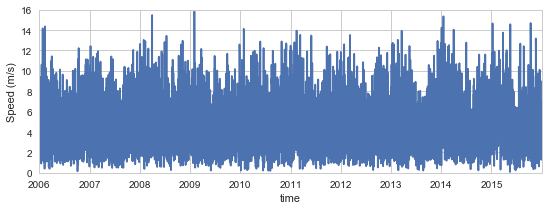

In [33]:
df.plot(y='speed', legend=False, figsize=(9,3))
plt.xticks(rotation='horizontal')
plt_configure(ylabel='Speed'+speed_unit_text)

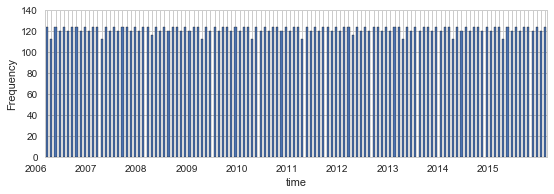

In [34]:
# Accumulation by month
df_ts = df.resample('M').count()
ax = df_ts.plot(y='speed', kind='bar',figsize=(9,3), legend=False)

import matplotlib.ticker as ticker
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(df_ts.index)
ticklabels[::12] = [item.strftime('%Y') for item in df_ts.index[::12]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
plt.xticks(rotation='horizontal')
plt_configure(ylabel='Frequency')

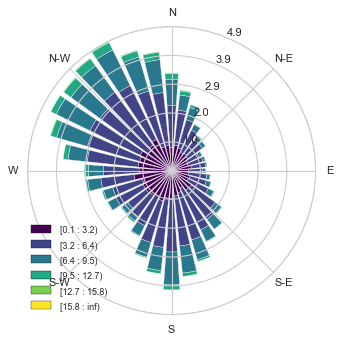

In [35]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()
plt_configure(figsize=(4.5,4.5))

In [36]:
# Examination for large datasets
if len(df) > 300000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=300000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [37]:
small_fig_size = (3.5,2.5)

In [38]:
# 2. CDF comparison
print('test') # papermill may have bugs on this
x, y_weibull, _, y_cdf_weibull,  weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig1 = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()+BIN_WIDTH, BIN_WIDTH), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=small_fig_size, xlabel='Speed'+speed_unit_text, ylabel='PDF', legend=True)

fig2 = plt.figure()
df['dir'].hist(bins=arange(0, 360, 10), alpha=0.5, label='Data', normed=True)    
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Density', legend=True, figsize=small_fig_size)
align_figures()

test


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPoAAAC3CAYAAAA7KkOPAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3Xl8TPf++PHXzCRDZCKJxJbWEtHUVo1QgsaS2Er51ZpY
Yi0XDVe5YikRW0Rju1Wl30tb9CqVq62Ua0mUWEtCGstFayslC4LMJDKJOb8/3Mw1zYpMTjLzeT4e
8zBzznzOvI/knc9nzvksCkmSJARBsGhKuQMQBMH8RKILghUQiS4IVkAkuiBYAZHogmAFRKILghWw
MdeBDQYDYWFhXLp0CbVazaJFi6hXr55x/48//sjGjRtRqVR4enoSFhYGUGQZQRBejNlq9JiYGPR6
Pdu2bWPatGlEREQY9z1+/JhVq1axadMmtm7dilar5aeffiqyjCAIL85siZ6QkICvry8AXl5enDt3
zrhPrVazdetW7OzsAMjNzaVSpUpFlhEE4cWZremu1WrRaDTG1yqVitzcXGxsbFAqlbi6ugKwefNm
MjMzad++Pf/+978LLVOYhIQEc52CIFQ4LVu2LHC72RJdo9Gg0+mMrw0Gg0nCGgwGIiMjuXbtGqtX
r0ahUBRbpjCFnZylSkhIEOdsBZ73nIuq9MzWdPf29iYuLg6AxMREPD09TfaHhoaSnZ3NZ599ZmzC
F1dGEIQXY7YavWvXrhw9epTAwEAkSSI8PJzo6GgyMzNp1qwZUVFRtGrVihEjRgAwfPjwAssIgvDy
zJboSqWSBQsWmGzz8PAwPr948WKB5f5cRhCElyc6zAiCFRCJLghWQCS6IFgBkeiCYAVEoguCFRCJ
LgjFGDFiBElJSQDo9XpatmzJ+vXrjfuDgoL4z3/+k69cXFwc27Zt49atWwwaNKjEn9e+fXsAFi5c
yJUrV14y+qfMdntNEMxp+vTpbN++vVSONXDgQCIjIwvd3759e+Lj42nevDkJCQm8/fbbHDp0iPff
f5/s7Gz++OMPGjVqlK9chw4dALh161apxPkyRI3+AgwGA/fu3SvwYTAY5A5PKGXt2rUjPj4egEOH
DjFw4EAyMjLIyMjgzJkztG7dmlOnTjF48GCGDRvGrFmzyMnJYceOHSxbtgyA+/fvM378eAYOHMia
NWsAmDlzprEnaFxcHDNnzjTbOYga/QWkp6ezcWc89pqqJtt12keM6NMKFxcXmSKzHpGRkUXWwqWp
SZMmXL16FUmSOHXqFFOnTqVt27YcO3aMS5cu8fbbbzN37ly2bNmCi4sLq1at4rvvvjMZp5GZmUlk
ZCRVqlRh6NCh+Pv7l0nseUSivyB7TVUcqjrLHYZQBpRKJY0aNSIuLo7q1aujVqvp0KEDBw8e5OLF
iwwdOpS5c+cyZcoU4Ol8C+3atTOZNKVRo0Y4ODgA8MYbb3Dt2jWTzzD38gqi6S4IJdC+fXs+//xz
43wJLVu25MKFCxgMBpydnalVqxafffYZmzdvZvz48fj4+JiUv3LlCjqdjtzcXJKSknjttddQq9Wk
paUBcOHCBbPGLxJdEEqgXbt2JCQk0LFjR+Dp5CkODg60bt0apVLJRx99xLhx4wgMDGTLli35Rl46
Ojry4YcfEhgYSPfu3WnYsCEDBw7kq6++YuTIkaSkpJg1fkVFX5JJjnHK9+7dI+rA5XxN94xH6Qzw
8zT7d3QxNts6vMh49MLeL2p0QbACItEFwQqIq+5FMBgMpKen59t+//59KvYXHsHaiEQvQmH3y1OT
b+Hg6EJVR3F7TagYRKIXo6D75dqMhzJFI+QprLX1IpydnVEqLftbrEj0cuD27ducOXMGHx8f0auu
hAprbT0va+nNKBK9FBkMBu7fv1/o/rya4+HDhxw8eJCYmBhiY2ONI5/c3NzYvn077dq1K6uQK7Sy
7J34888/M2XKFBo2bIgkSeTm5jJ8+HB69uxZ4Ptv377NxYsX8fPzK5P4iiMSvRRl6jLYvv8uLtVr
mGzP0Wdz/pefsctN4ejRo8THxxsHv1SpUoV33nmH+vXr8/nnn9OxY0dWrFhBcHAwCoVCjtMQCuHj
48PKlSsB0Ol0BAUF4e7uTuPGjfO998SJE1y9elUkuqWqonEw1jJpKX/w5afzufDLSXL02QDY2NjQ
tm1bunTpgr+/P23atEGtVgMwYMAAAgMDmTx5MsePH+cf//gH9vb2sp2LUDh7e3sCAgLYvXs3X3/9
NcnJyaSmpuLn58fkyZP5v//7Px4/fkyLFi1wcHDg008/RZIkdDody5cvx93dvUzjtewrEDIyPHnC
Z0tD+OXUYWq51cO/VwBbtmzh/v37HDlyhLCwMHx9fY1JDuDn58fp06fx8fHhm2++oU2bNly+fFnG
sxCK4uLiwoULF/Dy8mLDhg1ERUWxdetWVCoV48aN491338Xf359ff/2VyMhINm/eTLdu3dizZ0+Z
xypqdDPZteNLLl84TRvfHkyavQJtxgO6+XkaRzAV5tVXX+XQoUNMmzaNTz/9lFatWrFx40b69u1b
RpELJXX79m1atGjB2bNnOXHiBBqNBr1en+99NWvWZPHixVSpUoWUlBS8vb3LPFaR6Gbw+7XLRG36
BEdnV0YFh6JQKIq8UPfn2ztqtZrVq1fj4+PDuHHj6NevHyEhISxevLhEa9FZC532kWzH0Gq1bN++
nQEDBpCVlcWCBQu4ceMG3377LZIkoVQqjddh5s6dy/79+9FoNMyYMcPsQ1ILIn5rSllubg7rls0k
NyeH96cswOG/nWoKu1BX1O2doUOH0rx5c/r168fHH3/MqVOn+Oabb8rkPMo7Z2dnRvRpVWrHKokT
J04QFBSEUqnkyZMnTJo0CXd3d6ZNm0ZiYiJqtZp69eqRmpqKp6cna9eupWnTpvTp04ehQ4diZ2eH
q6srqamppRL38zBbohsMBsLCwrh06RJqtZpFixaZDMQHyMrKYtSoUSxevNi4XFPfvn2NSye/+uqr
LFmyxFwhmsW+H77mxpX/0LFbP7zbdDbZ9+yFupJ64403iI+PZ+TIkXz//fd4e3sTHh5udSO5/kyp
VJbpve82bdpw/PjxAvft3Lkz37aaNWuyd+9eAHr16mXW2ErCbIkeExODXq9n27ZtJCYmEhERwdq1
a437z549y7x580zG4WZnZyNJEps3bzZXWGb1+9VLxP64Bdcabgz7y6wSlSlJk97R0ZEdO3YQGRnJ
rFmzmDZtGr1796ZatWqlGb5gwcyW6AkJCcbZOLy8vDh37pzJfr1ez5o1awgJCTFuu3jxIllZWYwe
PZrc3FymTp2Kl5eXuUIsVfrsx3yzYRkGg4Fx08KpYq8pUbmSNukVCgUhISEYDAZmzZrFX//61wr7
B1Eoe2ZLdK1Wa2yCA6hUKnJzc40XkwpqelauXJkxY8YwcOBArl+/ztixY9mzZ0+xF6CKWgD+ZTx4
8IDk5EdkaLNMtqelpqJSqcl98r9tP2xZQ1ryLVq93QPn6nW4fft2sWWe3a62M/0MnTaTxMREnJyc
TLZ37tyZpk2b8vXXX+Pl5UWnTp1e+jwrCnP9nMuz0jpnsyW6RqNBp9MZXxsMhmIT1t3dnXr16qFQ
KHB3d8fJyYm0tDRq165dZDlzfV+9d+8ev93PP5OMQtKjslFTo6YbAOd/+ZkjMTuoXutVBo6YjJub
W75j/blMcdsfPqhE3bo1Cmyez507lxEjRhAZGcnIkSMtvp82iBlmSvr+wpitw4y3t7dxzurExMR8
c2gVJCoqioiICABSUlLQarVUr17dXCGWikxdBp8vn4VSqWLwmL+hVlcqteNu33+BqAOXTR4bd8bj
6urKggULSElJYdKkSaXyeYJlM1uN3rVrV44ePUpgYCCSJBEeHk50dDSZmZkEBAQUWGbAgAHMmjWL
wYMHo1AoCA8

In [39]:
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=small_fig_size)

fig = plt.figure()
plot(x, y_ecdf,'-', label='ECDF', color='black')
plot(x, y_cdf_weibull,'--',label='Weibull')
plt_configure(xlabel = 'Speed'+speed_unit_text, ylabel='P', legend=True, figsize=small_fig_size)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPUAAAC0CAYAAABMtWqsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGUVJREFUeJzt3XlUVOf9x/H3bCAKCm6gglh3MXoU0Lhi1GqNWWrjAkJo
/ZlmaT1N1MZEqSY5atRocrDYgzGmzeJSPbaNwdTURjBiNS4hGuquKMooQVyQzcDAzO8PyijbOAOz
MHe+r7+YO3fufa7w8d653/s8j8pkMpkQQiiG2tUNEELYl4RaCIWRUAuhMBJqIRRGQi2EwkiohVAY
rasb8DAZGRmuboIQzUZERMRD12n2oQbrDsReMjIynLo/Z1LysYFnHJ815PJbCIWRUAuhMBJqIRRG
Qi2EwkiohVAYCbUQCiOhFkJh3KJO3RTpx/XsSL3A1bwiugb6MX18L6IGBzdqW0eOHGHu3Ln07NnT
vCwgIICkpCS2b99OSkoKarUag8HAvHnzePTRR1m3bh1ffPEFHTt2pLKykhYtWvDqq68SFhZW7/ae
fPJJoqOjm3zcwnMpOtTpx/Ws2Xy/YJ+dW2h+3dhgDxs2jMTExBrL/vnPf3Lw4EE+/vhjdDodOTk5
PPvss3z22WcAzJo1i5kzZwKQlZXFnDlz+PzzzxvcnhBNoejL7x2pF2xa3ljbtm3jpZdeQqfTARAS
EsLOnTtp27ZtnXV79OhB//795fFXD2U0GTmRe5rishKH7UPRZ+qreUX1Ls9pYLk1Dh8+THx8vPn1
mDFjuHHjBiEhITXWCwgIaHAb7dq1486dO7Rv377O9j7++GM0Gk2j2yean+qvgDl3r9Oq11kM3jeZ
GjaZ6AFPOWR/ig5110A/snML6ywPCfRr9Dbru1w+dOgQubm5+Pnd3+6BAwfo06dPvdu4fv06EydO
pLKyUi6/FS79uJ41W46h7XQJXVgWBrWJytuB+JfV/7dhD069/DYYDCxYsIDY2FimTZtGamqqQ/c3
fXwvm5Y31tSpU0lOTqaiogKAy5cvs3jx4nrPuBcuXODixYsMGjTIrm0QzUv6cT2/e3cf7+3ci/cj
B9EFX4QKL8rOh1N+cTBffH3NYft26pk6JSUFf39/1qxZQ0FBAVOmTGH8+PEO21/1zbAdqRfIySsi
pIl3v6Hu5TfAxo0byc/PJzY2Fp1OR2VlJWvWrKFdu3ZA1SX17t27UavVaLVakpKS0GoVfZHk0dKP
61nz18Pogs/jHZaDyQQVeV0x5PQGY9XvvSlfAR9G5cwhgktKSjCZTPj6+nLnzh2rztbO7k6n5O57
Sj42cO3xPVg61bbNQx18CpVXGcZSXwzZ/TEW17zH0q1Ta9a9OtamfVh7fE4NdbXi4mJ+85vfMGPG
DJ56yvLNArlLLJq7/2aX8vdDt0H3I16hZ9C0zcNkVFFxvQcVud3BVPdb7tQRbRnQraXN+2qWgyTk
5uYyZ84cYmNjHxroanKmtg8lHxu47vg+2peGpuNVdMHnUWkrqCwMwJDdH9OPvnXW7dapdaO/Alp7
gnNqqG/evMns2bN54403GD58uDN3LYTdpR/X89f933LD/whefgWYKrSUX+5PZX4woKqz/oJnI5p0
P8daTg31+++/T2FhIcnJySQnJwNVN5latGjhzGYI0WT7MrJJ2v83tJ0uoflfmar8Sj8w3P9b1mnV
GI0mu9ygtYVTQ7148WIWL17szF0KYXdn8y/ywZmN6LoUYir3piw7DGNBYJ315sYMdlqQHyR1FSGs
9NW3F9n8/U7u+WZh0kJlrTJVtaZ8b7YHRT/7bW+/+tWvyMzMBKC8vJyIiAg+/PBD8/vx8fGcOXOm
zufS09PZvn07er2eGTNmWL2/kSNHmreblZXVxNaLpvgofS8fnPkT93yzMJb6Un7mUQxXwuoN9LpX
x7os0CBnapuMHDmSb7/9loEDB5KRkcGoUaPYv38/v/71rykrK+PatWv07du3zueioqIA0Ov1zm6y
aIL043q27cskr+VRNAF5oFVh0PdssEwF9n9asTHcPtSbTvydwznf2WVbw0LCCaNbg++PGDGC5ORk
Zs+ezf79+5k+fTrvvvsuRUVFnDp1iqFDh3Ls2DESExPRaDSEhISwdOlSdu3axaVLl4iJieH27du8
9NJL3Lp1i8cee4w5c+awcOFCJk+eTFRUFOnp6ezevZtVq1bZ5ZhE4+z/LofEf+9EF3IezUPKVBq1
yuk3wyxx+1A7U1hYGJcuXcJkMnHs2DHmz5/P8OHDOXToEOfOnWPUqFEsWbKErVu30q5dO9auXctn
n31W45HQ0tJS1qxZQ8uWLYmLi3PoY7LCeg8+Eda5i5E7/sfw+snth5apGvNkmKO5fajjB00lftBU
u23PUoFfrVbTt29f0tPT6dChA15eXkRFRfH1119z9uxZ4uLiWLJkCXPnzgXgxx9/ZMSIEYSGhpq3
0bdvX3NvrgEDBnD58uUa+3DBA34ezzyYhsqItnMWNwMvoWqgTFVbc7jcrs3tQ+1sI0eOZMOGDTzx
xBNA1dNu1TX3gIAAgoKCSE5Oxs/Pj9TUVFq2bElubq7581lZWZSUlODt7U1mZibR0dF888035Ofn
A3D69GnnH5SH25F6AbXvHXQ/OYnap+R/Zar+GAs61lnXVbVnW0iobTRixAgWL17M6tWrAfDy8sLP
z49+/fqhVqv5wx/+wAsvvIDJZKJVq1asXr26RqjbtGnDvHnzuH37NpMnT6Znz55Mnz6dhIQEdu3a
Rbdu3Vx0ZJ7jwUvt4CBvcr0z8A6pvzdVba6qPdvCJR06bCG9tOxHyccG1h3fg+PWqQPy8Ao93WBv
qvb+Pvj66OzWbbeprP39yZlaeJQdqRfq9KZqqEz1f0+GNfuzcn0k1MJjGE1G9MZTtBhwrk5vKpUK
Qju1bjZn5aaQUAtFuz/oXy6tep1BF3qz3jJVaFDzK001loRaKFZDg/7VV6ZqjqWpxpJQC8XacuAb
vB858kCZqqo3VXO7AWZvEmqhCOnH9XyyO4+b21IIDvImsP9V7gR+h6qeMtWdwh/5aMlEF7fYcSTU
wu3VLlPd6Hia/LtlqMr8KMsKqzPoX1PGfXcHEmrh9hoqU7Up7U9pcVmd9ZX0/bk+Emrh1iyVqQrU
5Sx4NsKu4767Awm1cBu1pyUePyqA70r2ogvNqrdMFRLoR9TgYMWHuDYJtXALNaYlVhnRqzPYcrmq
N1UP376cPBCk6DKVLSTUwi1UTz9cuzdVm7uRrIx+lvTOej79IpObhRUec5ndEAm1cAtXb95GF3oO
bWDN3lT5VM0JHjU4mFbGPEV3WLGWhFo0e0f1J/AZcBCj9l6d3lQhnZRdnmoMCbVoVh68Gdalk5bW
fc5zqfgcap0GQ07d3lSe+r3ZEqtCffToUdLS0sjOzkatVhMaGsr48eOJjIx0dPuEB7l/M8yEpkMO
+YHnuVlcQWefEBY8NpusrAqPK081hsVQnzlzhhUrVtC2bVsiIyMZMmQIWq0WvV7Pp59+SmJiIgkJ
CfTv399Z7RUKtiP1AqoWxeh+cgqN3x1zmapCG0aXp4PoMhgJsRUshjolJYWkpCQCAgLqvBcXF8et
W7f44IMPrA610Wjkrbfe4ty5c3h5ebF8+fIag/IJz2WoNHBN/R3ej2TVGfRPry52dfPcisVQv/76
6xY/3K5dOxYtWmT1zvbu3Ut5eTnbt2/nxIkTrFq1ivXr11v9eaFMZ/Oz2PDtZrRdfqh3biqlP6tt
bxZDfeHCBV577TWys7MJDw9n2bJldO7cudE7y8jIYPTo0QAMGjSIkydPNnpbwv3UfiLs6cdCuMIx
/p2VjgoVA9pEcDQ1oM6gf3IzzDYWQ/3mm28SExNDZGQkKSkprFq1iqSkpEbvrLi4GF/f+zMcaDQa
Kioqagx2Xx9

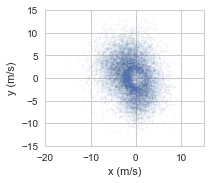

In [40]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=small_fig_size,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2 Overview by Direction

In [41]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [42]:
%%time
direction_plot(df, SECTOR_LENGTH, rebinned_angle, BIN_WIDTH, speed_unit_text)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANYAAACICAYAAACbZxWpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFw1JREFUeJzt3XtQFFfaB+DfwHBHBUHMikAYihRRXNcgBjaigIhGg1Fk
QYmDF4xRw1IYV0DFEaIRkRVLMdHdaKrQhEQ/Fo0pLRPxUiCyKEZwvSXCRpS4Q5SLMMPFgenvD4oO
IwP2AD0XeJ8qqmb6cvpt5eWcPn36tIBhGAaEkAFlpOsACBmMKLEI4QElFiE8oMQihAeUWITwgBKL
EB4IdR2APgoMDMSvv/7Kfjc3N4eLiwuWLFmC8PBwdnliYiKampqwb9++Ph9LqVRi0qRJaGlpUVme
k5ODCRMm9KnM3377DX5+ft2WFxUVYeTIkX0qs68kEgmsrKyQkJAAACguLkZUVJTabdPS0jB//vxe
9zcUlFg9+OijjxAaGgqGYSCTyXD58mV88sknqK+vx6pVqwAAmzdvRn9vAz569AgtLS344YcfYGlp
yS63tbXtc5nl5eUYPnw4zpw5o7K8P2X2xcGDB3Hs2DGsWLGCXTZp0iRcvnxZZbt9+/ahqKgIQUFB
L93fUFBi9cDKygqjRo0CADg4OEAkEsHIyAi7du1CaGgo7O3tMWzYsH4fp7y8HPb29nBxcel3WV3L
dHV1ZePXttraWmzatAk3btzAH/7wB5V1pqamKnHdunULubm5OHLkCKytrV+6v6GgaywNhIaGwsjI
CJcuXQLQ0RSMjY0FAGRmZmLlypWIjo6Gl5cXTpw4wanMiooKuLq6DmicnYnVV4GBgcjKyoJYLMaE
CRMQHByMCxcusOsTExMRGBjY4/4VFRUQCoU4efIknJycej1Weno6Zs+eDS8vrz7tr68osTRgaWkJ
R0dHlJeXq11fUFCAKVOm4Pjx45g+fTqnMsvLy9HS0oKoqCi89dZbEIvFuHnzZr/irKioQHV1NcLD
wzF16lR88MEH+OWXXzQqY//+/Vi8eDFOnz4NDw8PbNq0Cc+fPwfQ0QTOycnpcV9vb2/s37//pbVN
aWkpiouLERMT06f99RklloaGDx8OmUymdp2FhQVWrVoFNzc3zp0EFRUV7HXbwYMH4eLigqioKDx6
9KjPMVZUVKCxsRHx8fHYv38/BAIBxGIxnj17xrmMOXPmYM6cOXB2dsbatWtRV1fHdugMGzZsQDpB
srOz4e/vP+A1tj6gaywNyWSyHq+tHB0dIRAI1K57/Pgx5s6dy3738vLCoUOHkJ2djba2NlhZWQEA
PD09UVZWhpycHKxbt06ljJKSErz//vvs95CQEHz88cfdjnXhwgUYGxvDzMwMALB3715Mnz4d33//
vUqvZm9effVV9nPntU9bWxunfbl4/vw5zp07hx07dgxYmfqEEksDzc3N+OWXXxAdHa12fecvsjoO
Dg44efIk+93c3Jzdp+t+AoEAIpEI1dXV3crw9PRUKaPzF/5FXXsXO48xduxYtWX2xMTEpNuygXwQ
oqSkBO3t7ZybzIaGmoIaOHHiBIRCIfz9/TXeVygUwsXFhf0ZPXo0FAoFpk6dqtLR0d7ejnv37kEk
EnUro/N+WuePnZ1dt22qq6vh5eWFq1evsstkMhkePHgANzc3jePmy40bNzB+/PhufwQGC6qxeiCX
y/HkyRMAQGNjIwoLC5GRkYG4uDjY2NgMyDFMTEzg5+eHvXv34pVXXoGDgwMOHz6MhoYGRERE9KnM
0aNHY/z48di+fTu2bdsGMzMz7NmzBw4ODggODmbPR6FQ9Pk6qb/7A8BPP/0Ed3f3Pu+v7/Q6sa5f
v66T47a2tiIjIwMZGRkAOppcY8aMwcqVKzFhwgQ2rpqaGrS0tOD69et4/PgxmpqaNI45JCQEzc3N
WLduHWQyGdzd3ZGQkNBjzyMXy5cvR3Z2NlauXInW1lZ4enoiLi4OZWVlADpuvN65c6fHESOtra14
+PAhey6df2Du3LmDxsbGl+7fVWNjI6qrq7v9u1RWVsLMzOyl/1497a8vut4mUMHosZKSEl2HMOD0
4Zza2tqYsLCwAStPH85poHE5p962oWusIejw4cNss5DwQ6+bgoQfy5Ytg6mpqa7DGNSoxhqCKKn4
R4lFCA8osQjhASUWITygxCKEB5RYhPCAEosQHvB6H+sf//gHLly4AIVCgcWLF2PKlClITEyEQCCA
u7s7tm7dCiMjym0y+PD2W11cXIwbN27g66+/xtGjRyGVSpGamoq4uDhkZ2eDYRicP3+er8MTolMC
huHnbSO7d++GQCDA/fv3IZPJEB8fj7Vr1yI/Px8CgQB5eXkoLCzE1q1beyxDXwdeEtKpp0G4vDUF
6+rq8PjxYxw8eBBVVVVYs2YNGIZhn7C1srJCY2PjS8vpcfSwgbp+/TqdkwHgck69/eHnLbFsbGwg
EolgamoKkUgEMzMzSKVSdr1cLsfw4cP5OjwhOsXbNZaXlxcKCgrAMAyqq6vR3NwMX19fFBcXAwDy
8/MxefJkvg5PiE7xVmMFBATg2rVrCAsLA8MwkEgkGDt2LLZs2YKMjAyIRCLMmjWLr8MTolOcEuv9
999HaGgogoKC1E4y0pP4+Phuy7788kvu0RFioDg1BVetWoWCggLMmjULKSkp/Z5QkpDBjlON5e3t
DW9vb7S0tODs2bOIjY2FtbU1wsLCEBkZSc/3EPICztdYxcXF+Pbbb1FYWIhp06Zhzpw5KCwsxJo1
a3D48GE+YyTE4HBKrICAAIwdOxYLFy6ERCJhJ5ucMmUKwsLCeA2QEEPEKbGysrJgZWUFOzs7tLS0
oLKyEi4uLjA2Nub8Vg1ChhJOnReXLl3CypUrAXTMpbd69WocO3aM18AIMWScEuv48eP46quvAHRM
/J+bm0vd5oT0glNiKRQKlZ4/Te5lETIUcbrGCgoKwtKlS/H2228DAH744Yde3+hHyFDHKbE2bNiA
s2fP4tq1axAKhYiKiur2ImZCyO8438dyc3ODvb09+46ka9euwdvbm7fACDFknBIrJSUFFy9eVHnR
skAgwJEjR3gLjBBDximxCgsLcfbsWfbGMCGkd5x6BZ2cnAb0NZmEDHacaqwRI0Zg7ty5mDRpkkq3
e2pqaq/71dTUIDQ0FF988QWEQiHN0ESGDE6J5efnBz8/P40KVigUKuMKO2doevPNNyGRSHD+/HnM
nDlT84gJMQCcqowFCxbA29sbtra2CAkJweTJk7FgwYJe90lLS8OiRYvg4OAAALh9+zamTJkCAJg2
bRquXLnSz9AJ0V+caqwzZ87gwIEDaGlpwTfffINFixYhPj4e7777rtrtc3NzMXLkSPj5+eGf//wn
APRphiZgcE6BRudkGPpzTpwS6/PPP8fXX3+NJUuWwM7ODidOnMDy5ct7TKx//etfEAgEKCoqwt27
d5GQkIDa2lp2vSYzNA3FabUMzVA9p35Pf2ZkZARra2v2u4ODQ68dD50DdgFALBYjOTkZ6enpKC4u
xptvvon8/Hz4+PhwOTQhBonTNZa7uzu+/PJLtLW14e7du9iyZQs8PDw0OlBCQgIyMzMREREBhUJB
MzSRQY1TjSWRSHDgwAGYmZlh06ZN8PHxQUJCAqcDHD16lP1Mj5qQoYJTYllaWmL9+vVYv3493/EQ
MihwSiwPDw+2R6/TqFGjkJ+fz0tQhBg6Tol179499rNCoUBeXh5KS0t5C4oQQ6fxmCITExO8/fbb
+Pe//81HPIQMCpxqrJMnT7KfGYbB/fv36fF8QnrBKbE63xDSydbWFnv27OElIEIGA06J9bJR7IQQ
VZwSKzAwsFuvIPD7+D96lzAhqjglVkhICExMTBAeHg6hUIjvvvsO//nPf7Bu3Tq+49MKpVKJurq6
bsttbW3pmTH

Wall time: 8.95 s


## 2.3 Overview by Month

In [43]:
%%time
current_df = df.query('speed>=1')
for month in arange(1, 13): 
    sub_df = current_df[current_df.index.month == month]
    ax = WindroseAxes.from_ax()
    ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
    plt_configure(figsize=(2.8, 2.8), title='Month: %s'%(month))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAN4AAADjCAYAAADqg6rEAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXd4VGXa/z/TSyaTmUkyk94bhN6kI0WKgliWVdzVXfd1
d3FFt1p2fRXLz7LNvpa1rKsiKrtYQAUFREB6hySE9DrJJJmWyfTy+yNmICSBAEPxNd/rygVzznOe
c+bM+Z77fu4qCIVCIQYwgAFcUAgv9gUMYADfRwwQbwADuAgYIN4ABnARMEC8AQzgImCAeAMYwEXA
APEGMICLgAHi/R/BgFfou4UB4kUIM2bMID8/nyeffLLX/Q0NDeTn55Ofn4/ZbI7oudevX8+yZcvC
n59//nlGjhwZ0XM4HA6mT5/O2rVrIzrv9xUDxIsgBAIBX375Za/71q1bd97O++9//5vm5ubzNr/D
4eBXv/oVjY2N5+0c3zcMEC+CGDlyJPX19RQXF/fYt3btWvLz8y/CVZ0bdu3axaJFizh69OjFvpT/
UxggXgQxaNAgUlNTe0i3xsZGDh8+zNy5c3sc8+WXX3L99dczYsQIpk2bxjPPPIPf7w/vnzFjBq++
+irLli1j3LhxjBo1invvvReHwwHAzTffzK5du9i0aRP5+fnU19eHj/3ss8+YM2cOQ4cO5brrrmPf
vn3hffX19eTn5/P888+f8jvdcccd5OXl8dprr53VPRlA7xggXoQxe/bsHurmunXrGD58OAkJCd22
v//++yxdupRhw4bxwgsv8OMf/5g33niD++67r9u4V155BbvdzlNPPcVvfvMb1qxZw+jRo/n6669Z
tmwZgwcPZtSoUcTHx+P1egFwuVw8/fTT3HXXXTz77LO4XC7uvPPOMKn1ej3vv/8+ixYtOuX3Wb58
Oc8++yw6ne5cb80AToD4Yl/A/zXMnTuX119/nYqKCrKzs4FONXPevHndxgUCAZ555hmuuuqqsGFk
8uTJREdHs2zZMm677TYKCgoASEhI4KmnnkIgEDB58mS+/vprtm7dyrJly1i9ejUqlQqlUolUKkUq
lQKdVs6//vWvjBgxAgC/38+dd95JeXk5BQUFSKXS8L5TIS8vL2L3ZgDHMSDxIoyhQ4eSmJjIF198
AYDRaOTQoUPMmTOn27jKykrMZnMP9fOqq64CYM+ePd3mFAgE4c/x8fGIRCImT57ME0880et1iEQi
hg0bFv6cnJwMQHt7+zl8uwFECgPEizAEAkE3dXPdunUMGzaMxMTEbuNsNhsAsbGx3bZHR0cjlUrD
azgAhULR4xwA9913H9u3b8dqtfa4DplMhlB4/Oft+n8wGDzbrzaACGKAeOcBs2fPpqioiPr6etat
W9dDzQTQaDQAtLW1ddtut9vxer3h/aeCSqXi0Ucfpbq6uptBZgCXPgaIdx7QZeh47733OHjwYA81
EyAzMxOtVtvDIf3ZZ5+F5+gPJk+ejEajoaKi4twvfAAXDAPGlfMAoVDIFVdcwZtvvhle850MkUjE
0qVLefTRR4mJiWHmzJmUlpby/PPPM3fu3DMyagwZMoSvv/4aAI/H069jvF4vxcXFJCQk9LC2DuD8
Y0DinSfMnj0bn8/Xq++uCz/+8Y957LHH2LlzJ0uWLGH58uXceuut/O1vfzujc912222o1WoCgQDl
5eX9OsZkMnHDDTewcuXKMzrXACIDwUDNlQEM4MJjQOINYAAXAQPEG8AALgIGjCsDiBhWrFjBe++9
F/7c2NjI5Zdfzl//+tfwtqKiIh599FGcTicKhYKHH344HKHzvUJoAAM4D6isrAxNnz491NTU1G37
lVdeGdq1a1coFAqFtm7dGlqwYMHFuLyLjgGJd4khFAoRCATw+Xzd/rxeL36/n2AwSCgUCv8JBIJu
f0KhEKlUikQi6fF3YiTL+cYjjzzCXXfdhcFgCG8LBoPceuutjB07FujM5jAajRfsmi4lDBDvIiEU
CuF2u3E6nXR0dNDR0YHP58Pv94cJJRQKw/8KhULEYnG3baFQCLvdjlqtBjofbK/Xi9PpJBgMdvsD
wnPI5XKioqKIiopCqVQikUgi+t327NlDa2srCxcu7LZdKBTygx/8IPz5mWeeYdasWRE993cFA8S7
ADiZZA6HA7fbTSgUQiwWI5FIkMvlaDQaFAoFUVFR/SJDIBDgwIEDZGZmIhKJ+hwXDAbxeDx0dHTg
crlwuVyYzWZMJhOBQACRSBQmYiTIuGLFCm699dZugd0nX/fjjz/OkSNH+Pe//33W5/kuY4B45wmB
QAC73Y7FYsFmsxEMBsMki4qKIikpCbVafUHUP6FQiEKh6BFsDeDz+bBYLNjtdsxmM83NzQSDQWQy
GVqtFo1Gg1Kp7JNEvc23bds2Hn744V73e71efvOb3+B0OnnrrbdQqVTn9N2+qxggXgTh9XqxWq1Y
LBYcDgcikQiZTEZSUhJxcXGnlEoXCxKJBL1ej16vD29zu900NzdjsVhobm5GKBSi0WjQaDSnfVkc
O3aM9PT0Pgn1wAMPIJFIePXVVyOu4n6XMEC8c4TX66W1tRWz2YzH4wlLtNzc3PDa67sGuVxOeno6
0Kmmdn2/qqoqQqEQ0dHRxMbGotFoepCwtra2R2zq/fffz4wZM8jOzuajjz4iMzOz21pv1apVl+RL
6XxiIGTsLBAKhWhvb6e5uRm73Y5YLCYmJoaEhATkcvkFu46uNd6IESMuyIMbCoWwWq2YTCacTifQ
mZQbHx+PTCY77+f/v4QBiXcG8Pv9tLW10dzcjN/vJyoqiry8PKKjoy/2pV0QCAQCtFotWq2WYDCI
yWSipaWF5uZmoqOjMRgMqNXqfq8Hv88YIF4/0NHRgclkwmKxIBKJ0Ol0JCUlfe/UoxMhFArDKUVO
p5P6+noqKioQi8Xo9Xri4uIQiwcer74wcGdOAZfLRV1dHQ6HA6lUSkZGxkC1rV6gVCrJy8sjEAjQ
0NBAU1MTjY2NJCQkYDAYvtcvqL4wQLxe4PF4aGhowGKxgDREfv4gVFFRF/uyLnmIRCLS0tJITU3F
ZDLR1NREc3MzycnJxMXFXdDImUsdA8Q7AT6fj8bGRlpbW/GJ3JjVQj5squUuTzJDB4jXbwgEAgwG
A/Hx8WHp19TURHJyMjqdbmANyADxgE7rYFNTE03NTfgFXtrVAlY2NbC+tAyArOhYhmgTBh6YM4RQ
KCQpKYmEhATq6uqora3FaDSSmpr6vTfCfO/dCTabjaqqSnxBH06Vny/tZlZUHOw2RiIUsmrWrQzW
Xlq1SS60O+Fc4ff7qa6uxm63o1KpyMjICBfg/b7heyvx/H4/tbW1WCxmnLIOigQCnj+0HXegZ5k8
XzDI53UlDNIYvtdv6S787ne/o6ioKOyzXLp0KVdccUV4f319fbi/Q3R0NH/+859JTk5GLBaTk5OD
0+mkoqKCoqIi0tLSvpfq5/dS4tlsNiqrKvGG3JijRTxXfoBjtpZTHiMVivjoip+Rr9GfclxfCIYC
CAWRlUoXS+LNnj2bDz74oM/an3fffTcjRozgRz/6EW+//TYHDx7stYBTQ0MDzc3N30vpd9HNTF1d
a7rK03VhxowZ3Trf+Hw+Ro4c2a2p480338z1118f/myz2Rg5cmS4ccfJ8Pv9VFZWUlFRgVvmYW3Q
ytK9X56WdADeYIB19WfWqsrqbaHItoPPjf/mkPWbMzr2UoXFYsFsNnPPPfewYMECXnjhhR7daIPB
IB0dHUBn3Gdf0TzJyckUFhbi8/koKiqira2tX51t+/vMQGc42rhx41i4cGG3vy1btpzJ1444LglV
UyKRhBtw9BUFIpFIGD16NPv27WPWrFk4HA5aWloIhUKYzWZ0Oh179uxh9OjRvb45O9dyVQiFQvLz
8ynuaOPdw1+

Wall time: 19.7 s


In [44]:
df.describe()

lat       lon             x             y         speed  \
count  1.460800e+04  14608.00  14608.000000  14608.000000  14608.000000   
mean   4.875000e+01    261.75     -1.109358      0.384930      4.748665   
std    5.990080e-12      0.00      3.211968      4.081346      2.408673   
min    4.875000e+01    261.75    -15.540935    -14.095932      0.078250   
25%    4.875000e+01    261.75     -3.088625     -2.488610      2.839054   
50%    4.875000e+01    261.75     -1.099026      0.498566      4.399262   
75%    4.875000e+01    261.75      1.117667      3.211591      6.256472   
max    4.875000e+01    261.75     11.594738     14.818791     15.833463   

                dir          date          HrMn  dir_windrose  
count  14608.000000  1.460800e+04  14608.000000  14608.000000  
mean     180.842596  2.010567e+07    900.000000    212.993658  
std       88.380238  2.872210e+04    670.843355    102.903882  
min        0.024999  2.006010e+07      0.000000      0.024554  
25%      113.554200  2.008070e+07    450.000000    144.801217  
50%      168.028948  2.010567e+07    900.000000    224.524145  
75%      259.781612  2.013070e+07   1350.000000    303.423234  
max      359.969737  2.015123e+07   1800.000000    359.997332

# 3. Create configuration

In [45]:
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [46]:
FIT_LIMIT = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-FIT_LIMIT, FIT_LIMIT+BIN_WIDTH, BIN_WIDTH)
FITTING_RANGE = [[i,j] for i in fitting_axis_range
                 for j in fitting_axis_range]
        
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+BIN_WIDTH, BIN_WIDTH)

# 4. Kernel Density Estimation

In [47]:
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [48]:
%%time
if 'bandwidth' not in globals():
    bandwidth, fig = bandwidth_selection(df, knot_unit)
print(bandwidth)

0.8
Wall time: 0 ns


In [49]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    
config = create_gmm_config(bandwidth, FITTING_RANGE, FIT_LIMIT, BIN_WIDTH, 
                           KDE_KERNEL, FIT_METHOD)

In [50]:
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result, kde = fit_kde(df, config)
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 0.8 1681
[  3.31485877e-06   6.72312929e-06   1.35443643e-05   2.56899964e-05
   3.95017099e-05]


In [51]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=pdf_fig_size)
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuULHdZLvzUta/TPff7fXaCUVa4hLDJEuUzHgRZeFBR
JK7zhwf0W3owHAJLIYQIh7AlICb4iWStxA89JxtNYj49yIIlXgBBWUggbnNIQkhmZs+9p6/T9+66
fn/0/Gqqq6uqq6pr9nRP6lkrK3tmqn716+6qp9/L874vpaqqigABAgQ4p6DPegMBAgQIcJoISC5A
gADnGgHJBQgQ4FwjILkAAQKcawQkFyBAgHONgOQCBAhwrhGQXIAAAc41ApILECDAuUZAcgECBDjX
CEguQIAA5xoByQUIEOBcIyC5AAECnGsEJBcgQIBzjYDkAgQIcK4RkFyAAAHONQKSCxAgwLlGQHIB
AgQ41whILkCAAOcaAckFCBDgXCMguQABApxrBCQXIECAc42A5AIECHCuEZBcgAABzjUCkgsQIMC5
RkByAQIEONdgz3oDAc4eqqpCEARIkgSGYcBxHGiaBkVRZ721AAF6BqWqqnrWmwhwdmg2mygWixga
GoIoigCA/f19jIyMYGhoCDRNB6QXYKARWHIvYsiyjHq9jkwmg1gsBkmSwHEcVFWFqqqQZRmSJEEQ
BFAUBYZhAtILMHAISO5FCFVVIUkSZFkGRVGQZRnr6+uQZRksy0JRFNRqNYRCIbDsyS1CSK/ZbIKm
aTAMA4ZhwLJsQHoB+haBu/oig6IoEEUR5GM/ODhAPp/H4uIieJ6HIAhIpVKgKAqiKIJlWUSjUUQi
EUSjUTAM07YeWYeiKI3sWJbtOC5AgLNCYMm9SEDcT1mWAQCSJGF3dxeKooDjOAwNDUEQBITDYXAc
h2QyiVgshmaziVqthmKxiMPDQ430CPHpyUySJKiqimaziXQ6jampKfA8H5BegDNFQHIvAiiKAkmS
oCgKKIpCuVzG3t4eRkdHkUgksL293XY8RVFQVRUURSEcDiMcDmN0dBSqqqLRaKBer+Po6AipVAoc
x2mEpye9arUKQRA00iPubWDpBbjWCEjunIPE0UgyIZVKoVQqYWFhQbPUnEYsKIrSyExPerVaDUdH
Rzg4OADP84hGo1BVVSNV4CQOGJBegGuNgOTOKRRFgSzLUBQFACAIAnZ2dsDzPNbW1rSEQi/JAj3p
kWsSS09RFOzs7CAUCmnxvEgkAppu6c8D0gtwrRCQ3DmEoijIZrMoFotYXFxEoVBAKpXC5OQkRkdH
O4jNaMkRd9UtaJrW4nWlUgkzMzNapjafz6PRaCAUCrW5t3akV6lUkEgkEAqFAtIL4BkByZ0zEPcU
aBHH7u4u6vU6VlZWEA6HO44/TdkHTdMIh8OIRqMAWuRbr9dRr9eRy+XQbDYRDoc1Sy8cDreRXjqd
BsuykCQpsPQCeEZAcucERu2bKIqoVCoYHh7G2tqaRh5W5wKnS3hAi/RisRhisRiAE9Kr1WrIZrMa
6RFLjyQ/iGVp5d7yPB9o9AJYIiC5cwCj9i2bzSKdToPneczNzdmea0YOXt1VtzCSHqnAIFUYkiQh
lUohFotpll63RAapvQ1ILwBBQHIDDmK9AS2S2NvbgyRJmJ6eRqlUcrRGv+jBGYZBPB5HPB4HAGxs
bCCRSEAQBKTTaYii2GbpmZGeKIpoNBoa6VEUBY7jAvf2RYyA5AYURve0Uqlgd3cXw8PDWFxcRLVa
dUReVhaPH8TX6xoURSEajWJ4eBjAiaVXq9VweHgISZI00otGowiFQh2kd3BwoK0RWHovTgQkN4DQ
a98A4PDwEIVCAXNzcxgaGtKO80oyfhDAaZCI0dKTJEkjvVQqBUmS2uQqoVBI24uVpReQ3vlHQHID
BFVVkcvlwHEcwuEwRFHE7u4uKIrC2toaOI7TjnX60F6r+NtpgGVZDA0NacSuJ72joyPIsqwlXEKh
UFuCQk96JKZHiC8gvfOFgOQGBKQ0q1AoaHGqvb09jI+PY3x8vOOh7JW8BpH4zEhvf39f+78sy23N
BvSkpyiKlsDRkx7LsmBZNiC9AUZAcgMAWZa1hpYAUCgUIAgClpaWNA2aV+jrVPW/Ow8gBEWITxTF
NktPURSN8KLRaJsFpyc9URRRLpcxNTUVkN4AIiC5PoYxudBoNFCpVBAKhXDhwgXbjOEgu6GnBY7j
wHEcEokEAEAURdRqNdTrdeTzeaiq2mbpEdKTJAm1Wk1zbymKCiy9AUJAcn0KfecQAMjn8zg8PEQ4
HEYymewqiXBKcvoYldtzBx2kpVQymYSqqm2WXj6fBwBEIhGtkaje4tVbegHp9TcCkutD6LVviqJg
f38fjUYDKysr2sP3YoBfMhYnhENRFHieB8/zbaRXq9VQLpfRbDaxublpaukBAen1MwKS6yMY3dNa
rYadnR0MDQ1ppVluLDQ3LZTIA6pvd94r/CCpsyIHPelxHId8Po+pqSnUajVUq1Vks1nQNN0mWbEi
PaAlfyFiZr2eL8DpIyC5PoFR+5bJZJDNZjE7O4tkMulpTacko6oqrl692pZV5Hkeoii2yVLc4Dw9
xKqqau8Jz/MYHh7WxjjWajVUKhWk02kwDNOWyNBbcIqiIJ1OIxaLYWhoqG0oEKnMCHA6CEjujKGq
KqrVKg4ODrC4uAhZlrW25Gtra+B5vu14t7G2biClX0NDQ5ifn4coikin0xAEAVtbW2AYRntozWY8
9DucuqtuQVEUQqEQQqEQRkZG2kivXC5rpKdvFa9vOGBm6ZGhQAHp+YuA5M4QJLlAJmCRtuQjIyOY
nJzsqXi+23GqquLw8BDFYhEURWFsbAyyLIPnea0mdHR0FM1mE/V6HaVSCYeHh5btzs8znBClGekZ
3zvSLRk4SWgY3VtBEACgYyhQQHreEZDcGUHvnpLWSHt7e5ifn9fKlszgJtZmdRzpEsyyLNbW1vD8
889r+zD+n8x4IA8uaXdeKBRwcHCgNcE09oM7T/ASWzR777a3t8GybMdQIP0kNEJmZOiQceZtQHru
EZDcNYZZ37fd3V2oqooLFy44Cvz34q6WSiXbSoluaxILbmxsTGt3btYPjkguzhp+uau9rkEyrolE
QpuBQVrFF4tFpFIp8DzflsiwIr2DgwPMzMy0TUILSM8aAcldQxinZhWLRezv72N0dNRxZtNrTare
PTWrlOi13TnQ3iWEjDzUx/MGtbnlacT13AwF0ocGKIpCvV7XqmACS687ApK7RtBr31RVxf7+PqrV
KpaXlzWJghN4Eeoa3VMjmZrVvZLYkRvou4TU63WMjY1BVVVHZVQvBtiRpd1QIH1oIBKJtFnJgXvb
HQHJnTLMSrN2dnYQiUSwtrYGhmEgy7IrTZubxINT9/Q0rBUiqSAF88YyKgBt2UevchU7XEtBsZ/r
6K1kY2iASH7MhgLpSU+SpID0EJDcqcJYWJ/L5ZBOpzE9PY2RkRHt926Fu24SDwcHB10L+U9LYmGE
WRkV0ZllMpm2B5tILk5rL2eBXshS/97k83msrq6i2WyiVqt1HQoEmJNes9lEPB4/9xUZAcmdAlRV
hSzLePrpp3HhwgUAwP7+PgRBwOrqqtbMkcCtC9rtWOKeAjB1T63WJDf6tahd1VcUGMW1RHKhKApy
uRzi8fiZylVOS2vnBeRzMcZDrYYC2ZHe1atXsbS0pAmSiThZbxGeBwQk5zOMhfXVahWpVAqJRALz
8/Ndp2Y50WPZgbinExMTqNfrjoihH25oM53Z+vo6GIbpSa7SDxleAj/IUi8o1sNuElomk4EgCG2t
4sPhMFRV1e4PM0uPiJMHnfQCkvMRxtIsUlw/NzentfcxA7lpnZKc2YOrqipSqRRKpZLmnqZSKccP
lnHNsyYH8p6

## 4.1 Bootstrap GOF limit

In [52]:
%%time
gof_kde=Parallel(n_jobs=-1)(delayed(resampled_kde)(df, kde_result, config) for i in arange(20)) 

for gof_name in [ 'R_square', 'K_S','Chi_square']:
    plt.figure(figsize=(4,3))
    pd.DataFrame(gof_kde)[gof_name].hist()
    plt_configure(title=gof_name)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQwAAADXCAYAAADvAm/LAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAE0BJREFUeJzt3X9YlfX9x/HnAUR+BtoFu2woKVlxmTpwc7WlS2ZqZf4a
GkJ0FV2tsXKbwwvUnQtpE8WZM2OVmrmaQ825rrL8XnapkXVtXK1J2mwqE5EJLFTwB7/Gz/v7xy7P
5lL5HDwH7pOvx1/8uM/t63zwvLjvc27O22FZloWIiAG/vg4gIr5DhSEixlQYImJMhSEixlQYImJM
hSEixgL6OoB8UVJSEtXV1Zd8LSQkhNtvv53s7GwSEhL6KJlc7xy6DsN+kpKSeOihh5g1axYAlmXx
+eef86tf/YrDhw+zd+9ewsLC+jilXI90SmJToaGhREVFERUVRXR0NKNGjaKgoIBz587x0Ucf9XU8
uU6pMHxIYGAgAP7+/t1ue+zYMdLT00lISODOO+/kZz/7Gc3Nza7vb9y4kfHjx5OYmMiyZct4+umn
KSwsBGDhwoX86Ec/umR/SUlJ/O53vwOgo6OD1atXk5SUxIgRI/jWt75Ffn4+nZ2drtsvWLCA2bNn
M3bsWP70pz/R3t7Os88+y7e//W3GjBnD448/zvHjxz2yLtJ7VBg+or6+nvz8fKKiovj617/e7fZZ
WVncdNNNvPXWW6xbt46SkhLWr18PwO9//3sKCwvJycnh9ddfp6amhn379hln2bBhA2+99RYFBQW8
++67ZGdnU1RUxHvvvefa5p133iEtLY3XXnuNhIQEnn/+eT744AOee+45tm3bxtChQ0lPT6ehocH9
xZA+o8KwqYKCAhISEkhISGD06NGMHz+euro6fvOb3xg9f1FVVUVkZCQ33XQTo0eP5qWXXmLatGkA
bNmyhZSUFB544AGGDx9OQUEBwcHBxtluueUWli9fztixY4mJiWHGjBnExcVRVlbm2mbo0KHMmDGD
+Ph4HA4Hr776Knl5eXzjG98gLi4Op9NJWFgYO3bscH9xpM/oVRKbevLJJ5k2bRptbW1s3ryZ3bt3
8/TTTzN8+HCj28+bN48VK1bwxhtvcPfdd3Pvvfdy3333AVBeXk5GRoZr27CwMG677TbjbBMnTuTP
f/4zK1eupKKigrKyMk6ePMmkSZNc2wwePNj18T/+8Q/a2trIyMjA4XC4vt7a2qrTEh+jwrCpAQMG
EBsbC8CSJUuor68nMzOTHTt2MGjQoG5v/+ijjzJlyhT27t3Lhx9+SHZ2Nh9++CHLly8nKCiIrq6u
S7a/+PwIcMmD+qKOjg7Xx7/+9a957bXX+N73vsekSZPIysoiKyvrku2DgoJcH198bmPjxo3ceOON
l2ynV3t8i05JfMSSJUvw9/cnLy+v221bW1vJz8+nvb2dtLQ01q5dS25uLjt37gTg1ltv5eDBg67t
29raOHr0qOvzfv360dTU5Pq8qamJ+vp61+evvPIKOTk5LFy4kBkzZhATE0NNTQ1XeoV+yJAhBAQE
UF9fT2xsLLGxsQwePJg1a9ZckkPsT4XhIwYOHEhWVhbvv/8+e/bsueq2/fv3p7S0lJ///OeUlZVR
Xl7O7t27GTVqFADf//732bZtG9u3b+f48eM888wznD592nX7kSNH8pe//IV9+/Zx/PhxnE4nfn7/
+a/yla98hX379lFZWclnn33Gj3/8Y86fP09bW9tl84SGhjJ37lzy8/Ndt8vLy6O4uNj4FEvsQYXh
Q5KTk0lISGDZsmW0tLRcddvnnnsOPz8/UlNTSU5OJjAwkGeffRaAcePGkZubywsvvMCsWbMIDg4m
Pj7eddvp06czdepU5s+fT1paGvHx8SQmJrq+X1BQQFVVFQ8++CBPPfUUMTExJCcn89lnn10xT3Z2
NpMnT2bx4sVMmzaNsrIyNmzYcMlzHWJ/utJTAJg1axYTJkxg3rx5fR1FbExPevqg+vp61xOJlxMS
EkJoaGgvJpLrhQrDB6WmplJRUXHF7z/xxBMsWLCgFxPJ9UKnJCJiTE96iogxFYaIGFNhiIgxt570
XLduHe+99x7t7e3MnTuX2bNneyuXiNiQcWF89NFHfPLJJ2zZsoWWlhY2btzozVwiYkPGr5KsWrUK
h8PB3//+dxobG8nOzmbkyJHeziciNmJ8hHH27FlqampYu3YtVVVVZGZmsmvXrsv+ZaOIfDkZF0Zk
ZCTDhg0jMDCQYcOG0b9/f+rr67/w58r/bf/+/R4JKSLuGzNmjMf3aVwYY8aM4be//S2PPfYYp06d
oqWlhcjISKPb+Yr9+/f7VF5QZk8rKyvjyYI9hA34qkf213i2mnULJ3Lrrbd6ZH+mvPXL2rgwJkyY
wMcff0xycjKWZZGbm2v0ZrQi8uXh1suq2dnZ3sohIj5AF26JiDEVhogYU2GIiDEVhogYU2GIiDEV
hogYU2GIiDEVhogYU2GIiDEVhogYU2GIiDEVhogYU2GIiDEVhogYU2GIiDEVhogYU2GIiDEVhogY
U2GIiDG33tNz5syZhIWFARATE8Py5cu9EkpE7Mm4MFpbW7Esi02bNnkzj4jYmPEpyZEjR2hpaSEj
I4NHHnmEAwcOeDOXiNiQ8RFGUFAQjz/+OLNnz+bEiRM88cQT7Nq1i4AAt85qROjs7KSsrMyj+4yL
i9OcnF5g/GgfOnQosbGxOBwOhg4dSmRkJKdPn2bQoEFXvZ2vjUv0tbzge5mrqqqYt+L/CImI9sj+
ms+fIidtFLGxsde8r8rKSg8kutShQ4doaGjw+H77gnFhbN++nbKyMvLy8qitraWxsZGoqKhub2fX
kXiXY+cRflfii5krKysJiYj22DhCgDvuuMMj4wjDw8Phnc89kOg/PJXNHX0+KjE5OZlFixYxd+5c
HA4Hy5Yt0+mIyHXG+BEfGBjIqlWrvJlFRGxOF26JiDEVhogYU2GIiDEVhogYU2GIiDEVhogYU2GI
iDEVhogYU2GIiDEVhogYU2GIiDEVhogYU2GIiDEVhogYU2GIiDEVhogYU2GIiDEVhogYU2GIiDEV
hogYc7sw6urq+M53vkN5ebk38oiIjblVGO3t7eTm5hIUFOStPCJiY24VxooVK0hJSSE62jMTq0TE
txjPJXnjjTcYOHAg48aNY/369cb/gK+N8fO1vOCbmT3NU+MINSrx6owL4w9/+AMOh4OSkhIOHz5M
Tk4OL730UrfjEn1pjJ8vjh30xczeeFBqVOKl+nxUYlFRkevj9PR08vLyjGarisiXh15WFRFjPZqm
vGnTJk/nEBEfoCMMETGmwhARYyoMETGmwhARYyoMETGmwhARYyoMETGmwhARYyoMETGmwhARYyoM
ETGmwhARYyoMETGmwhARYyoMETGmwhARYyoMETGmwhARYyoMETFm/J6enZ2dOJ1OKioqcDgcPPPM
M73+1uki0reMjzCKi4sB2Lp1Kz/5yU9YvXq110KJiD0ZH2FMnDiRe+65B4CamhpuuOEGb2USEZty
a8xAQEAAOTk57N69m+eff97oNr42xs/X8oJvZvY0jUrsHW7PJVmxYgULFixgzpw57Ny5k5CQkKtu
70tj/Hxx7KAvZtaoRO/z1i8R4+cw3nzzTdatWwdAcHAwDocDPz+9yCJyPTE+wpg0aRKLFi0iLS2N
jo4OFi9eTFBQkDeziYjNGBdGSEgIa9as8WYWEbE5nVOIiDEVhogYU2GIiDEVhogYU2GIiDEVhogY
U2GIiDEVhogYU2GIiDEVhogYU2GIiDEVhogYU2GIiDEVhogYU2GIiDEVhogYU2GIiDEVhogYU2GI
iDHj9/Rsb29n8eLFVFdX09bWRmZmJt/97ne9mU1EbMa4MHbs2EFkZCQrV67k3LlzzJgxQ4Uhcp0x
LowpU6YwefJ

Wall time: 13.7 s


## 4.2 Bivariate Empirical Limit

In [53]:
# gofs_bivar_set, gofs_mean_set_bivar, _, _ = bivar_empirical_limit(df_all_years, config)
# align_figures()
# display(gofs_mean_set_bivar)

## 4.3 Univariate GOF Limit

In [54]:
# gofs_univar_set, gofs_mean_set, _, _, _ = univar_empirical_limit(df, df_all_years)
# align_figures()
# display(gofs_mean_set)

# 5. GMM by Expectation-maximization

In [55]:
velocity_set = array(list(zip(df.x, df.y)))
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
# clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full', max_iter=1, init_params='random')
clf.fit(velocity_set)
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.374   0.479  -3.091  2.633  2.870   0.053
2  0.334  -3.499   1.399  2.763  2.808  -0.205
3  0.292  -0.404   3.673  2.729  3.166  -0.213

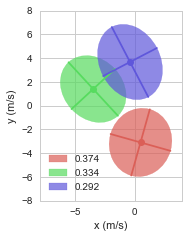

In [56]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [57]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmQJHd9L/jJu+6urj6n72OQkeFhc6/Xlo+xMYbA4jmE
EUSYXRx4vev1EzZBeDkFCsMYyWDhZwN6D3lldkd6IJldB8gm3h9YtvGxBmEhG0sIrO6evqu7rq67
MiuP/aP6l5WZlVmVWZU1U9XKD6FgZirzl7+qyvzU53tTmqZpCBAgQIALCvpmbyBAgAABhomA5AIE
CHChEZBcgAABLjQCkgsQIMCFRkByAQIEuNAISC5AgAAXGgHJBQgQ4EIjILkAAQJcaAQkFyBAgAuN
gOQCBAhwoRGQXIAAAS40ApILECDAhUZAcgECBLjQCEguQIAAFxoByQUIEOBCIyC5AAECXGgEJBcg
QIALjYDkAgQIcKERkFyAAAEuNAKSCxAgwIVGQHIBAgS40AhILkCAABcaAckFCBDgQiMguQABAlxo
BCQXIECACw32Zm8gwM2HpmmQJAmyLINhGHAcB5qmQVHUzd5agAADg9I0TbvZmwhw8yCKIorFIuLx
OJrNJgDg6OgIk5OTiMfjoGk6IL0AY41Ayb2AoSgK6vU6MpkMotEoZFkGx3HQNA2apkFRFMiyDEmS
QFEUGIYJSC/A2CEguRcgNE2DLMtQFAUURUFRFGxtbUFRFLAsC1VVUavVIAgCWLZ9ixDSE0URNE2D
YRgwDAOWZQPSCzCyCMzVFxhUVUWz2QT52o+Pj5HP57GysgKe5yFJEtLpNCiKQrPZBMuyiEQiCIfD
iEQiYBjGtB5Zh6IonexYlu04LkCAm4VAyb1AQMxPRVEAALIs4+DgAKqqguM4xONxSJKEUCgEjuMw
MTGBaDQKURRRq9VQLBZxcnKikx4hPiOZybIMTdMgiiJOT08xNzcHnucD0gtwUxGQ3AsAqqpClmWo
qgqKolAul3F4eIhUKoVEIoG9vT3T8RRFQdM0UBSFUCiEUCiEVCoFTdPQaDRQr9dxdnaGdDoNjuN0
wjOSXrVahSRJOukR8zZQegFuNAKSu+AgfjQSTEin0yiVSlheXtaVmluPBUVROpkZSa9Wq+Hs7AzH
x8fgeR6RSASapumkCrT9gAHpBbjRCEjugkJVVSiKAlVVAQCSJGF/fx88z2Nzc1MPKAwSLDCSHrkm
UXqqqmJ/fx+CIOj+vHA4DJpu5Z8HpBfgRiEguQsIVVWRzWZRLBaxsrKCQqGAdDqN2dlZpFKpDmKz
KjlirnoFTdO6v65UKuHSpUt6pDafz6PRaEAQBJN52430KpUKEokEBEEISC9A3whI7oKBmKdAizgO
Dg5Qr9exvr6OUCjUcfww0z5omkYoFEIkEgHQIt96vY56vY5cLgdRFBEKhXSlFwqFTKR3enoKlmUh
y3Kg9AL0jYDkLgisuW/NZhOVSgXJZBKbm5s6eTidCwyX8IAW6UWjUUSjUQBt0qvVashmszrpEaVH
gh9EWTqZtzzPBzl6ARwRkNwFgDX3LZvN4vT0FDzPY3Fxseu5duTQr7nqFVbSIxUYpApDlmWk02lE
o1Fd6fUKZJDa24D0AhAEJDfmIOoNaJHE4eEhZFnG/Pw8SqWSqzVGJR+cYRjEYjHEYjEAwPb2NhKJ
BCRJwunpKZrNpknp2ZFes9lEo9HQSY+iKHAcF5i3L2AEJDemsJqnlUoFBwcHSCaTWFlZQbVadUVe
TorHD+IbdA2KohCJRJBMJgG0lV6tVsPJyQlkWdZJLxKJQBCEDtI7Pj7W1wiU3gsTAcmNIYy5bwBw
cnKCQqGAxcVFxONx/bh+ScYPAhgGiViVnizLOuml02nIsmxKVxEEQd+Lk9ILSO/iIyC5MYKmacjl
cuA4DqFQCM1mEwcHB6AoCpubm+A4Tj/W7UN7o/xvwwDLsojH4zqxG0nv7OwMiqLoARdBEEwBCiPp
EZ8eIb6A9C4WApIbE5DSrEKhoPupDg8PMT09jenp6Y6HclDyGkfisyO9o6Mj/f8VRTE1GzCSnqqq
egDHSHosy4Jl2YD0xhgByY0BFEXRG1oCQKFQgCRJWF1d1XPQ+oWxTtX4bxcBhKAI8TWbTZPSU1VV
J7xIJGJScEbSazabKJfLmJubC0hvDBGQ3AjDGlxoNBqoVCoQBAGXL1/uGjEcZzN0WOA4DhzHIZFI
AACazSZqtRrq9Try+Tw0TTMpPUJ6siyjVqvp5i1FUYHSGyMEJDeiMHYOAYB8Po+TkxOEQiFMTEz0
TIlwS3JGH5XXc8cdpKXUxMQENE0zKb18Pg8ACIfDeiNRo+I1Kr2A9EYbAcmNIIy5b6qq4ujoCI1G
A+vr6/rD90KAX2ksbgiHoijwPA+e502kV6vVUC6XIYoidnZ2bJUeEJDeKCMguRGC1Tyt1WrY399H
PB7XS7O8KDQvLZSGodz8WPNmkYOR9DiOQz6fx9zcHGq1GqrVKrLZLGiaNqWsOJEe0Ep/IcnMxny+
AMNHQHIjAmvuWyaTQTabxcLCAiYmJvpac5A8OT8SeS8KNE3Ta2R5nkcymdTHONZqNVQqFZyenoJh
GFMgw6jgVFXF6ekpotEo4vG4aSgQqcwIMBwEJHeToWkaqtUqjo+PsbKyAkVR9Lbkm5ub4HnedLxX
X5sbXGQfnFtz1SsoioIgCBAEAZOTkybSK5fLOukZW8UbGw7YKT0yFCggPX8RkNxNBAkukAlYpC35
5OQkZmdnByqev8jEdaPhhijtSE8URdTrdZRKJZycnOjdkoF2QMNq3kqSBAAdQ4EC0usfAcndJBjN
U9Ia6fDwEEtLS3rZkh28kJcXkstmsyiVSgiFQvpowgAt9PNjYZyPQUhvb28PLMt2DAUyTkIjZEaG
Dlln3gak5x3BnXyDYdf37eDgAJqm4fLly67IxU9zlaSplMtlzM7O6ikUlUoF9XrdZG5160k3qvDL
XB10DRJxTSQS+gwM0iq+WCwinU6D53lTIMOJ9I6Pj3Hp0iXTJLSA9JwRkNwNhHVqVrFYxNHREVKp
lD7jtBf8rEkl0VuKorCysqLPbCBmVSwWs21dbu3ie9ExDL+el6FAxkloFEWhXq/rVTCB0uuNgORu
EIy5b5qm4ejoCNVqFWtra3qKghv44Wsjhf6ZTAaLi4s4OjqyLesiD9fU1JSpi28mk4EkSaZIol1a
ROATNKMbWXYbClQoFHB8fKwPBSKJyeQ8IDBvuyEguSHDrjRrf38f4XAYm5ubYBgGiqL4ntPmdJws
y3pjTRK9PTo66qlWnLr42rU5IubYKOBGJhT7uY5xKBD5kSFKT9M0XL9+3XYokJH0ZFkOSA8ByQ0V
1sL6XC6H09NTzM/PY3JyUv/3YSTu2h1HzNNEIoHl5WXd3Oznhrfr7Var1VCr1VAoFCDLMnK5HOLx
uF4d4BV+EeWoPNCDkKWR9PL5PDY2NiCKImq1Ws+hQIA96YmiiFgsduErMgKSGwI0TYOiKHjmmWdw
+fJlAMDR0REkScLGxobezJHAqwnq9eG3mqekQN16DLnR+zGJWZZFIpFAIpGApmnY3d2FIAj6kBry
kJKHcJyit8PKtesH5Hsxkh7gPBSoG+ldv34dq6urekIySU42KsKLgPG508YE1sL6arWKdDqNRCKB
paWlnlOz3ORjuQE5zs487XdNtyCRxFgspgcyrImyJH3CGEns9j76xaiYzYA/ZGlMKDai2yQ04kM1
tooPhULQNE3/3O2UHklOHnfSC0jOR1hLs0hxvZN6IiA3rVuS8/Lgbm1tIR6Pm8xTO1jX9JMc7BJl
rZHEYUZu/SKWQeEnyfVCt0lop6enkCQJmqahUCh0TEIjx8uy3NEqfhxJLyA5H0DMU1mW9f5jJPdt
ZWWla3KvdZ1

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPIAAAC3CAYAAAAo/QN7AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtQVPf5/9/LwiJll1CiIIqgEmjwfkFjGkMaU6U6NAQN
CCjMGKOJHZNorTF2BGxFMRfNzNdLUjWpEbSA5DeTZJohsWq0iYmNUBS5qMWwiiigBrMgAp49vz82
53h2Odfl7JXPa2Zn3D23Z5E3z/N5Ps/n+WhomqZBIBA8Gh9XG0AgEPoPETKB4AUQIRMIXgARMoHg
BRAhEwheABEygeAFuETIZ8+eRVZWFgDAaDQiIyMDmZmZyMvLg9lsdoVJBIJH43Qh7927Fxs2bEB3
dzcAoKCgAKtWrcKhQ4dA0zSOHj3qbJMIBI/H6UKOjIzEjh072Pc1NTWYPn06ACAhIQGnTp1ytkkE
gsfj6+wHJiYmoqmpiX1P0zQ0Gg0AIDAwECaTSfIeFRUVDrOP4B1MnTpV8pz/Vh2FmQrmPabT6TB+
/Hi1zXIYTheyLT4+D4KCzs5OBAUFybquNP+ko0ySjanDBIPe4GoziB02pG1IkHWemQpGWGQB77GW
K+vVNMnhuDxrPWbMGJw+fRoAcPLkScTHx7vYIgLB83C5kNetW4cdO3Zg4cKF6O3tRWJioqtNIhA8
DpeE1hERESgtLQUAjBo1CkVFRa4wg0DwGlzukQkEQv9xebKL0JeLt7us3seGBLjIEoKnQITsImzF
yiV6/Aj23w3VV4mw3Qyz2YyNGzfiwoUL0Ol0yM/PR1RUFHv82LFj2LVrF3x9fbFgwQKkpaWxx86e
PYt33nkHhYWFAIC6ujps2rQJWq0WOp0Ob775JgYPHoz8/HxUVlYiMDAQALB7924YDMIzAkTITsRW
kFzBCmF7DlfYRNCu4V//+hd6enpQUlKCqqoqbN26Fe+99x4AoLe3FwUFBSgrK0NAQAAyMjIwa9Ys
DB48GHv37sWnn36KgIAH/2+bN29GTk4O4uLiUFxcjL1792L9+vWoqanBvn37EBISIssmMkZ2Ahdv
d7Hiix4/gn3ZA/da7n0JzqOiogJPPvkkAGDSpEk4f/48e6yhoQGRkZF46KGHoNPpMHXqVHz//fcA
+lY1AsD27dsRFxcHAKAoCv7+/jCbzTAajcjNzUV6ejrKysokbSIe2YFwxas2zD0bqq+iqUsDbU8X
8dBOoqOjA3q9nn2v1Wpx//59+Pr6oqOjwyoEDgwMREdHB4C+VY0AEBoaCgCorKxEUVERDh48iLt3
72Lx4sVYsmQJKIpCdnY2xo0bh0cffVTQJuKRHYCtB3Yk0eNHIDz6Yfa5BMej1+vR2dnJvjebzfD1
9eU91tnZKTq2BYDPP/8ceXl52LNnD0JCQhAQEIDs7GwEBARAr9djxowZqK+vF70HEbKK8IXQzoJ5
Hgm3Hc+UKVNw8qSlRLiqqgqxsbHssejoaBiNRrS3t6OnpwdnzpzB5MmTBe/1ySefoKioCIWFhRgx
wvL70tjYiIyMDFAUhd7eXlRWVmLs2LGiNpHQWgW4wnGmePmIHj+CTYiRUNsxzJ49G9988w3S09NB
0zS2bNmCzz77DHfv3sXChQvxxhtvYOnSpaBpGgsWLEBYWBjvfSiKwubNmxEeHo5XXnkFADBt2jS8
+uqrSE5ORlpaGvz8/JCcnIyYmBhRmzSe2Ne6oqLCLRZN1LV1QKvVAnCtgE0mE2/41lB9FYDzstvu
tGhCzuqniooK0UUTcu7hLhCPbAfu5IHFIN5ZmtNdUbyfj3SuGf2GCFkh3DGwnLXTroadqnKydyY4
FyJkBaidia42/ajo/PGGX9r9LOKdvRsiZJmoJWKueKNjhsq+ruHSDatr7RE1EbP3QoQsgdoCViJe
LrbXVV+6AUC5oLliBkio7S0QIYughoj7K2AhmPtVX7qB+xSFyZCfLeZWhRHv7B2QghAB+iviatOP
DhMxF1bQCsfbAKxqtgmeDREyD2qIGLCIzJEiZhg2PAjRMUOt/njIhYjZOyBCtkFNETsbe70zEbPn
Q8bIHPoj4v4K+Gxnm+CxiYFDZN8nOmYom+FWkghjkmAEz4QI+WecKWI+0cZGhfLbZWy1Ol+OqO0V
MwCS/PJQiJDhPBFzBSkkXFtszztrbGX/LSZqe8RMvLLnMuDHyPaKuNr0I/5HWTaikxLx2c42VsSx
UaGyRcwH93qxcJxrl5IxM7MUkuBZDGiP3B8RA5ZssdSica6A1SQ2KpQNuymawhSBeWTufDPQvzJP
gvsy4D2yvSJWEkqrLWIGR3ln4pU9jwHrkS/e7nKYiB0tYFsiQvW4fqsLZzvbZI2b5TIQEl+XO5p4
Px/pXDP6jdsIOSUlhW1oFhERgYIC/gXfauAuIq7qbZH9/El+/F0mGLihtpSYqy/dkAyxB0riq536
tatNUAW3EHJ3dzdommabdjsSe0JGNUVsK964YdKCr2tuZa8TE7RcMQOQnc0eCF5ZKWo2qDcajXjj
jTeg0WgQExODvLw8+Pj4oLS0FMXFxfD19cWKFSvw9NNPi9rkFmPk+vp6dHV14YUXXkB2djaqqqoc
8hx7kluOEHHcsFD2JQfu+VW9LaKeXM6YWe542Z27n7gSboP6NWvWYOvWrewxpkH9hx9+iMLCQpSU
lODmzZsAgL1792LDhg3o7u5mzy8oKMCqVatw6NAh0DSNo0ePoq2tDYWFhSguLsYHH3yA7du3o6en
R9Qmt/DIgwYNwtKlS5GamorGxkYsW7YM5eXlbItRPkwdyrtzUJQG4dEPy+7swUwvDRseJHiNyWTC
JdrS/jQiVM9r10XfB59FBev71VkkwmDxjhXtzQCA2PuWbDX3ueEPB6CptQOVP91AjCaQ9z6hQwPR
fO0nSVsoikJdWwciAuS1drPn/8XTkNugHgDboH7u3Llsg/rXX3+dPb+mpgbTp08HACQkJOCbb76B
j48PJk+eDJ1OB51Oh8jISNTX12PChAmCNrmFkEeNGoWoqChoNBqMGjUKwcHBaGtrQ3h4uOA1Spu8
XbzdhdhJyjyxr1Yr6olNJhMu+9yDFlpBT1zV2wIttLK9r1zGGQyoa25Fg/Yuort/0efnEac34KKx
FZdxTzDM9tV2ohH3RUNswyQDGqqvwqCXDq/dpfmeo1GzQT1N09BoNOy5JpNJ9B5CuEVoXVZWxoYn
LS0t6OjowJAh8uuLpVA6LpYbTl+iO0ULPLihtBwu0FesXlIw9+V6fC5SYbbcklIyHWWNmg3qfXx8
rM4NCgqyq8m9Wwj5+eefh8lkQkZGBlavXo0tW7aIhtX2IHe8p2RMHBGqFzwuR8S2wh0zJNTqJUfY
zP2Fxs1yxsxyK7+ImC2o2aB+zJgxOH36NADg5MmTiI+Px4QJE1BRUYHu7m6YTCY0NDRYPYMPtwit
dTodtm3b5mozFIk4NipUcDwoJWKuKMcMERY691htWyt73a80kVbnRQXr0WTqQlVvC29Wm8lm8yF3
bnmgTEfJQa0G9QCwbt065OTkYPv27Rg9ejQSExOh1WqRlZWFzMxM0DSN1atXw9/fX9Qmr29QL3fO
2J7sNN+YUEzEcgUsRm3bA0EygmYa1Nc1W44JTVFdNLYKjpcbZMwtSzW8d5cxspIG9f9P9zXvsfk9
Mz2qQb1bhNbuQn+nmOSImAmb7YV7vW24LRVmA9KlnGKQ6Sj3hQgZ8saIaolYDp0+dexLCHvELDZe
ZloFyYGMld0PrxayklJMORlcqbJLscSWmIi5wmXEGxc8VPAY955jhoTiyqCbfexgikeUfgdSJOKZ
uEWyy5Uo8cZCVPW2iCa2hETMFSYjXC62n9W130CnTx0CzXFWn4/S63HhXt9EWNywUFQ18yfA+Mo4
lS6qILgPXu2

## Goodness-of-fit Statistics

In [58]:
gmm_pdf_result = exp(clf.score_samples(FITTING_RANGE))
gof_df(gmm_pdf_result, kde_result, BIN_WIDTH)

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.977  0.012      0.112    13666.721  2.051542e-07      0.036       0.193

In [59]:
gmm_em = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
mixed_model_pdf_em = generate_gmm_pdf_from_grouped_gmm_param(gmm_em)

# 6. GMM by Optimization

In [60]:
max_speed = df.speed.max()
# max_speed = ceil(df['speed'].quantile(.999))

config = create_gmm_config(bandwidth, FITTING_RANGE, FIT_LIMIT, BIN_WIDTH, KDE_KERNEL, FIT_METHOD)
result = fit_gmm(df, config=config, x0=gmm_em_result)

## 6.1 GMM Result

In [61]:
gmm_params = result['gmm']
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm_params)
gmm_pdf_result = result['gmm_pdf_result']
pretty_print_gmm(gmm_params)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.698  -1.817   2.050  3.258  3.386  -0.023
2  0.254   1.022  -3.891  2.450  2.740   0.299
3  0.048  -1.885  -1.201  1.070  1.773  -0.498

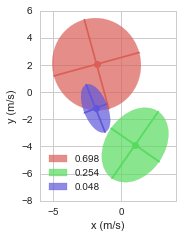

In [62]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(result['gmm'], ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Bivariate Goodness-of-fit statistics

In [63]:
gof_df(gmm_pdf_result, kde_result, BIN_WIDTH)

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.990  0.010      0.076    18707.064  8.480442e-08      0.023       0.124

In [64]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plt.gca().set_xlabel('x')
plt.gca().set_ylabel('y')

plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmULFd9JvjFmlvt+6uqV+tDsowbjEDIGi+y1Y0xjDnG
zWDDnJlpBrp78GBolmNACFkM4hmxSbjBqI1s7B49PBKWm8EcGPvYZjPQLLIsbEsCpFfvVVVWVlVW
LpV7Zmx3/si6UTcjIyIjMqNeZZbiO+edqlcZeeNmZsSXv/X7cYQQghAhQoQ4o+BPewMhQoQIcZII
SS5EiBBnGiHJhQgR4kwjJLkQIUKcaYQkFyJEiDONkORChAhxphGSXIgQIc40QpILESLEmUZIciFC
hDjTCEkuRIgQZxohyYUIEeJMIyS5ECFCnGmEJBciRIgzjZDkQoQIcaYRklyIECHONEKSCxEixJlG
SHIhQoQ40whJLkSIEGcaIcmFCBHiTCMkuRAhQpxphCQXIkSIM42Q5EKECHGmEZJciBAhzjRCkgsR
IsSZRkhyIUKEONMQT3sDIU4fhBAoigJN0yAIAiRJAs/z4DjutLcWIkTP4Agh5LQ3EeL00Gg0UCgU
MDw8DFVVAQCpVArj4+MYHh4Gz/Mh6YUYaISW3LMYuq6jVqvh4OAAiUQCmqZBkiQQQkAIga7r0DQN
iqKA4zgIghCSXoiBQ0hyz0IQQqBpGnRdB8dx0HUdly9fhq7rEEURhmGgWq0iEolAFI8vEUp6jUYD
PM9DEAQIggBRFEPSC9G3CN3VZxkMw4CqqqAf++7uLnK5HJaWliDLMhRFwd7eHjiOg6qqEEUR8Xgc
sVgM8XgcgiC0rEfX4TjOJDtRFNuOCxHitBBacs8SUPdT13UAgKZpSCaTMAwDkiRheHgYiqIgGo1C
kiSMjo4ikUig0WigWq2iUChgf3/fJD1KfCyZaZoGQggajQbS6TRmZ2chy3JIeiFOFSHJPQtgGAY0
TYNhGOA4DqVSCTs7O5iYmMDIyAi2trZajuc4DoQQcByHaDSKaDSKiYkJEEJQr9dRq9VweHiIvb09
SJJkEh5LepVKBYqimKRH3dvQ0gtxrRGS3BkHjaPRZMLe3h6KxSLOnz9vWmpeIxYcx5lkxpJetVrF
4eEhdnd3Icsy4vE4CCEmqQLHccCQ9EJca4Qkd0ZhGAZ0XYdhGAAARVGwvb0NWZaxvr5uJhR6SRaw
pEfPSS09wzCwvb2NSCRixvNisRh4vll/HpJeiGuFkOTOIAzDQCaTQaFQwNLSEvL5PPb29jAzM4OJ
iYk2YrNactRd9Que5814XbFYxLlz58xMbS6XQ71eRyQSaXFv3UivXC5jZGQEkUgkJL0QXSMkuTMG
6p4CTeJIJpOo1WpYXV1FNBptO/4kyz54nkc0GkU8HgfQJN9arYZarYZsNotGo4FoNGpaetFotIX0
0uk0RFGEpmmhpReia4Qkd0ZgrX1TVRXlchljY2NYX183ycPpucDJEh7QJL1EIoFEIgHgmPSq1Soy
mYxJetTSo8kPalk6ubeyLIc1eiEcEZLcGYC19i2TySCdTkOWZSwsLLg+144cunVX/cJKerQDg3Zh
aJqGvb09JBIJ09LrlMigvbch6YWgCEluwEGtN6BJEjs7O9A0DXNzcygWi57W6Jd6cEEQMDQ0hKGh
IQDAxsYGRkZGoCgK0uk0VFVtsfTsSE9VVdTrdZP0OI6DJEmhe/ssRkhyAwqre1oul5FMJjE2Noal
pSVUKhVP5OVk8QRBfL2uwXEc4vE4xsbGABxbetVqFfv7+9A0zSS9eDyOSCTSRnq7u7vmGqGl9+xE
SHIDCLb2DQD29/eRz+exsLCA4eFh87huSSYIAjgJErFaepqmmaS3t7cHTdNaylUikYi5FydLLyS9
s4+Q5AYIhBBks1lIkoRoNApVVZFMJsFxHNbX1yFJknms15v2WsXfTgKiKGJ4eNgkdpb0Dg8Poeu6
mXCJRCItCQqW9GhMjxJfSHpnCyHJDQhoa1Y+nzfjVDs7O5iamsLU1FTbTdkreQ0i8dmRXiqVMn/q
ut4iNsCSnmEYZgKHJT1RFCGKYkh6A4yQ5AYAuq6bgpYAkM/noSgKlpeXzRq0bsH2qbJ/OwugBEWJ
T1XVFkvPMAyT8OLxeIsFx5KeqqoolUqYnZ0NSW8AEZJcH8OaXKjX6yiXy4hEIrhw4YJrxnCQ3dCT
giRJkCQJIyMjAABVVVGtVlGr1ZDL5UAIabH0KOlpmoZqtWq6txzHhZbeACEkuT4FqxwCALlcDvv7
+4hGoxgdHe1YEuGV5NgYld/nDjqopNTo6CgIIS2WXi6XAwDEYjFTSJS1eFlLLyS9/kZIcn0ItvbN
MAykUinU63Wsrq6aN9+zAUGVsXghHI7jIMsyZFluIb1qtYpSqYRGo4ErV67YWnpASHr9jJDk+ghW
97RarWJ7exvDw8Nma5YfC82PhBK9QVm5814RBEmdFjmwpCdJEnK5HGZnZ1GtVlGpVJDJZMDzfEvJ
ihPpAc3yF1rMzNbzhTh5hCTXJ7DWvh0cHCCTyWB+fh6jo6NdremVZAghuHr1aktWUZZlqKraUpbi
B2fpJiaEmO+JLMsYGxszxzhWq1WUy2Wk02kIgtCSyGAtOMMwkE6nkUgkMDw83DIUiHZmhDgZhCR3
yiCEoFKpYHd3F0tLS9B13ZQlX19fhyzLLcf7jbV1Am39Gh4exuLiIlRVRTqdhqIo2NzchCAI5k1r
N+Oh3+HVXfULjuMQiUQQiUQwPj7eQnqlUskkPVYqnhUcsLP06FCgkPSCRUhypwiaXKATsKgs+fj4
OGZmZnpqnu90HCEE+/v7KBQK4DgOk5OT0HUdsiybPaETExNoNBqo1WooFovY3993lDs/y/BClHak
Z33vqFoycJzQsLq3iqIAQNtQoJD0ukdIcqcE1j2l0kg7OztYXFw025bs4CfW5nQcVQkWRRHr6+t4
+umnzX1Yf9IZD/TGpXLn+Xweu7u7pgimVQ/uLKGb2KLde7e1tQVRFNuGArGT0CiZ0aFD1pm3Ien5
R0hy1xh2um/JZBKEEFy4cMFT4L8Xd7VYLLp2SnRak1pwk5OTpty5nR4cLbk4bQTlrva6Bs24joyM
mDMwqFR8oVDA3t4eZFluSWQ4kd7u7i7OnTvXMgktJD1nhCR3DWGdmlUoFJBKpTAxMeE5s9ltTyrr
ntp1SvQqdw60qoTQkYdsPG9QxS1PIq7nZygQGxrgOA61Ws3sggktvc4ISe4aga19I4QglUqhUqlg
ZWXFLFHwgm4Kda3uqZVM7fpeaezID1iVkFqthsnJSRBCPLVRPRvgRpZuQ4HY0EAsFmuxkkP3tjNC
kjth2LVmbW9vIxaLYX19HYIgQNd1XzVtfhIPXt3Tk7BWaEkFbZi3tlEBaMk+dluu4oZrWVAc5Dqs
lWwNDdCSH7uhQCzpaZoWkh5CkjtRWBvrs9ks0uk05ubmMD4+bv7db+Gun8TD7u5ux0b+kyqxsMKu
jYrWmR0cHLTc2LTk4qT2chrohSzZ9yaXy2FtbQ2NRgPVarXjUCDAnvQajQaGhobOfEdGSHInAEII
dF3HE088gQsXLgAAUqkUFEXB2tqaKeZI4dcF7XQsdU8B2LqnTmvSC/1a9K6yHQXW4lpacmEYBrLZ
LIaGhk61XOWkau26Af1crPFQp6FAbqR39epVLC8vmwXJtDiZtQjPAkKSCxjWxvpKpYK9vT2MjIxg
cXGx49QsL/VYbqDu6fT0NGq1midi6IcL2q7O7PLlyxAEoadylX7I8FIEQZZsQTELt0loBwcHUBSl
RSo+Go2CEGJeH3aWHi1OHnTSC0kuQFhbs2hz/cLCginvYwd60XolObsblxCCvb09FItF0z3d29vz
fGNZ1zxtcqD

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPIAAAC3CAYAAAAo/QN7AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtQVPf5/9/LwiJll1CiIIqgEmjwfkFjGkMaU6U6NAQN
CCjMGKOJHZNorTF2BGxFMRfNzNdLUjWpEbSA5DeTZJohsWq0iYmNUBS5qMWwiiigBrMgAp49vz82
53h2Odfl7JXPa2Zn3D23Z5E3z/N5Ps/n+WhomqZBIBA8Gh9XG0AgEPoPETKB4AUQIRMIXgARMoHg
BRAhEwheABEygeAFuETIZ8+eRVZWFgDAaDQiIyMDmZmZyMvLg9lsdoVJBIJH43Qh7927Fxs2bEB3
dzcAoKCgAKtWrcKhQ4dA0zSOHj3qbJMIBI/H6UKOjIzEjh072Pc1NTWYPn06ACAhIQGnTp1ytkkE
gsfj6+wHJiYmoqmpiX1P0zQ0Gg0AIDAwECaTSfIeFRUVDrOP4B1MnTpV8pz/Vh2FmQrmPabT6TB+
/Hi1zXIYTheyLT4+D4KCzs5OBAUFybquNP+ko0ySjanDBIPe4GoziB02pG1IkHWemQpGWGQB77GW
K+vVNMnhuDxrPWbMGJw+fRoAcPLkScTHx7vYIgLB83C5kNetW4cdO3Zg4cKF6O3tRWJioqtNIhA8
DpeE1hERESgtLQUAjBo1CkVFRa4wg0DwGlzukQkEQv9xebKL0JeLt7us3seGBLjIEoKnQITsImzF
yiV6/Aj23w3VV4mw3Qyz2YyNGzfiwoUL0Ol0yM/PR1RUFHv82LFj2LVrF3x9fbFgwQKkpaWxx86e
PYt33nkHhYWFAIC6ujps2rQJWq0WOp0Ob775JgYPHoz8/HxUVlYiMDAQALB7924YDMIzAkTITsRW
kFzBCmF7DlfYRNCu4V//+hd6enpQUlKCqqoqbN26Fe+99x4AoLe3FwUFBSgrK0NAQAAyMjIwa9Ys
DB48GHv37sWnn36KgIAH/2+bN29GTk4O4uLiUFxcjL1792L9+vWoqanBvn37EBISIssmMkZ2Ahdv
d7Hiix4/gn3ZA/da7n0JzqOiogJPPvkkAGDSpEk4f/48e6yhoQGRkZF46KGHoNPpMHXqVHz//fcA
+lY1AsD27dsRFxcHAKAoCv7+/jCbzTAajcjNzUV6ejrKysokbSIe2YFwxas2zD0bqq+iqUsDbU8X
8dBOoqOjA3q9nn2v1Wpx//59+Pr6oqOjwyoEDgwMREdHB4C+VY0AEBoaCgCorKxEUVERDh48iLt3
72Lx4sVYsmQJKIpCdnY2xo0bh0cffVTQJuKRHYCtB3Yk0eNHIDz6Yfa5BMej1+vR2dnJvjebzfD1
9eU91tnZKTq2BYDPP/8ceXl52LNnD0JCQhAQEIDs7GwEBARAr9djxowZqK+vF70HEbKK8IXQzoJ5
Hgm3Hc+UKVNw8qSlRLiqqgqxsbHssejoaBiNRrS3t6OnpwdnzpzB5MmTBe/1ySefoKioCIWFhRgx
wvL70tjYiIyMDFAUhd7eXlRWVmLs2LGiNpHQWgW4wnGmePmIHj+CTYiRUNsxzJ49G9988w3S09NB
0zS2bNmCzz77DHfv3sXChQvxxhtvYOnSpaBpGgsWLEBYWBjvfSiKwubNmxEeHo5XXnkFADBt2jS8
+uqrSE5ORlpaGvz8/JCcnIyYmBhRmzSe2Ne6oqLCLRZN1LV1QKvVAnCtgE0mE2/41lB9FYDzstvu
tGhCzuqniooK0UUTcu7hLhCPbAfu5IHFIN5ZmtNdUbyfj3SuGf2GCFkh3DGwnLXTroadqnKydyY4
FyJkBaidia42/ajo/PGGX9r9LOKdvRsiZJmoJWKueKNjhsq+ruHSDatr7RE1EbP3QoQsgdoCViJe
LrbXVV+6AUC5oLliBkio7S0QIYughoj7K2AhmPtVX7qB+xSFyZCfLeZWhRHv7B2QghAB+iviatOP
DhMxF1bQCsfbAKxqtgmeDREyD2qIGLCIzJEiZhg2PAjRMUOt/njIhYjZOyBCtkFNETsbe70zEbPn
Q8bIHPoj4v4K+Gxnm+CxiYFDZN8nOmYom+FWkghjkmAEz4QI+WecKWI+0cZGhfLbZWy1Ol+OqO0V
MwCS/PJQiJDhPBFzBSkkXFtszztrbGX/LSZqe8RMvLLnMuDHyPaKuNr0I/5HWTaikxLx2c42VsSx
UaGyRcwH93qxcJxrl5IxM7MUkuBZDGiP3B8RA5ZssdSica6A1SQ2KpQNuymawhSBeWTufDPQvzJP
gvsy4D2yvSJWEkqrLWIGR3ln4pU9jwHrkS/e7nKYiB0tYFsiQvW4fqsLZzvbZI2b5TIQEl+XO5p4
Px/pXDP6jdsIOSUlhW1oFhERgYIC/gXfauAuIq7qbZH9/El+/F0mGLihtpSYqy/dkAyxB0riq536
tatNUAW3EHJ3dzdommabdjsSe0JGNUVsK964YdKCr2tuZa8TE7RcMQOQnc0eCF5ZKWo2qDcajXjj
jTeg0WgQExODvLw8+Pj4oLS0FMXFxfD19cWKFSvw9NNPi9rkFmPk+vp6dHV14YUXXkB2djaqqqoc
8hx7kluOEHHcsFD2JQfu+VW9LaKeXM6YWe542Z27n7gSboP6NWvWYOvWrewxpkH9hx9+iMLCQpSU
lODmzZsAgL1792LDhg3o7u5mzy8oKMCqVatw6NAh0DSNo0ePoq2tDYWFhSguLsYHH3yA7du3o6en
R9Qmt/DIgwYNwtKlS5GamorGxkYsW7YM5eXlbItRPkwdyrtzUJQG4dEPy+7swUwvDRseJHiNyWTC
JdrS/jQiVM9r10XfB59FBev71VkkwmDxjhXtzQCA2PuWbDX3ueEPB6CptQOVP91AjCaQ9z6hQwPR
fO0nSVsoikJdWwciAuS1drPn/8XTkNugHgDboH7u3Llsg/rXX3+dPb+mpgbTp08HACQkJOCbb76B
j48PJk+eDJ1OB51Oh8jISNTX12PChAmCNrmFkEeNGoWoqChoNBqMGjUKwcHBaGtrQ3h4uOA1Spu8
XbzdhdhJyjyxr1Yr6olNJhMu+9yDFlpBT1zV2wIttLK9r1zGGQyoa25Fg/Yuort/0efnEac34KKx
FZdxTzDM9tV2ohH3RUNswyQDGqqvwqCXDq/dpfmeo1GzQT1N09BoNOy5JpNJ9B5CuEVoXVZWxoYn
LS0t6OjowJAh8uuLpVA6LpYbTl+iO0ULPLihtBwu0FesXlIw9+V6fC5SYbbcklIyHWWNmg3qfXx8
rM4NCgqyq8m9Wwj5+eefh8lkQkZGBlavXo0tW7aIhtX2IHe8p2RMHBGqFzwuR8S2wh0zJNTqJUfY
zP2Fxs1yxsxyK7+ImC2o2aB+zJgxOH36NADg5MmTiI+Px4QJE1BRUYHu7m6YTCY0NDRYPYMPtwit
dTodtm3b5mozFIk4NipUcDwoJWKuKMcMERY691htWyt73a80kVbnRQXr0WTqQlVvC29Wm8lm8yF3
bnmgTEfJQa0G9QCwbt065OTkYPv27Rg9ejQSExOh1WqRlZWFzMxM0DSN1atXw9/fX9Qmr29QL3fO
2J7sNN+YUEzEcgUsRm3bA0EygmYa1Nc1W44JTVFdNLYKjpcbZMwtSzW8d5cxspIG9f9P9zXvsfk9
Mz2qQb1bhNbuQn+nmOSImAmb7YV7vW24LRVmA9KlnGKQ6Sj3hQgZ8saIaolYDp0+dexLCHvELDZe
ZloFyYGMld0PrxayklJMORlcqbJLscSWmIi5wmXEGxc8VPAY955jhoTiyqCbfexgikeUfgdSJOKZ
uEWyy5Uo8cZCVPW2iCa2hETMFSYjXC62n9W130CnTx0CzXFWn4/S63HhXt9EWNywUFQ18yfA+Mo4
lS6qILgPXu2

In [65]:
# Fit on future, considering nonstationary data charatertics
df_future = df_all_years['2006':'2015']
pd.DataFrame([kde_gofs(df_all_years['2006':'2015'], kde_result, config),
              gmm_gofs_in_previous(df_all_years['2006':'2015'], gmm_pdf_result, config)])

Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.000000      0.000000  0.000000  0.000000e+00    0.000000     0.000000   
1    0.076127  18707.064489  0.009522  8.480442e-08    0.023051     0.124368   

   R_square  
0  1.000000  
1  0.990334

## 6.3 Univariate Goodness-of-fit

In [66]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

def f_em(V,theta):
    return (mixed_model_pdf_em([[V*cos(theta),V*sin(theta)]]))*V

In [67]:
from rpy2 import robjects
def fit_vm(radian_data, n_vM_dir):
    dir_data = [cos(radian_data), sin(radian_data)]
    %R -i dir_data
    robjects.r.assign('n_vM_dir', n_vM_dir)
    robjects.r('''
        require(movMF)
        result = movMF(dir_data, n_vM_dir, nruns = 10)
        theta = result$theta
        alpha = result$alpha
        ''')
    theta = robjects.r('theta')
    alpha = robjects.r('alpha')
    vM_params = [[sqrt(sum(power(theta_,2))), np.arctan2(theta_[1], theta_[0]), alpha[i]] 
                     for i, theta_ in enumerate(theta)]
    return vM_params

def fit_al(df_speed, df_dir):
    # Fit Kappa
    kap_params = distr.kap.lmom_fit(df_speed.copy().as_matrix())
    # Fit dir vM
    dir_data = np.radians(df_dir.as_matrix())
    dir_params = fit_vm(dir_data, N_VM_DIR)
    # Fit phi vM
    phi_data = phi_from_speed_dir(df_speed, df_dir, kap_params, dir_params)
    connection_params=fit_vm(phi_data, N_VM_PHI)
    return kap_params, dir_params, connection_params, phi_data

kap_params, dir_params, connection_params, phi_data = fit_al(df.speed, df.dir)
al_params = [kap_params, dir_params, connection_params]

Speed Distribution Comparison
0.970519770023 0.965105765295 0.959797097876 0.98726407169
Wall time: 30.7 s


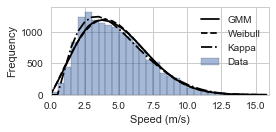

In [68]:
%%time
x = bins = arange(0, max_speed+BIN_WIDTH, BIN_WIDTH)
# 1. Fit Weibull
_, y_weibull, density_expected_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed, x=x)
# 2. GMM Model
_, _, density_speed_expected_gmm, y_cdf_gmm, density_dir_expected = gmm_marginal_distribution(f, bins, bin_width=BIN_WIDTH)
y_gmm_em  = array([integrate.nquad(f_em, [[x_, x_+BIN_WIDTH],[0, 2*pi]]) 
                   for x_ in x])[:, 0]
# 3. Al
kap = distr.kap(**kap_params)
density_expected_kap = kap.cdf(bins[1:]) - kap.cdf(bins[:-1])

# 4. Plot Comparison
df['speed'].hist(bins=bins, alpha=0.5, label='Data')
plot(x[:-1]+BIN_WIDTH/2, density_speed_expected_gmm*len(df.speed),'-', color='black', label='GMM')
plot(x, y_weibull*len(df.speed)*BIN_WIDTH, '--', color='black', label='Weibull') 
plot(x, kap.pdf(x)*len(df.speed)*BIN_WIDTH, '-.', color='black', label='Kappa')

print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text, ylabel='Frequency', 
              legend={'loc':'best'}, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

density, _ = np.histogram(df['speed'], bins=x, density=True)
R_square_gmm = sector_r_square(density*BIN_WIDTH, density_speed_expected_gmm)
R_square_weibull = sector_r_square(density*BIN_WIDTH, density_expected_weibull)
R_square_gmm_em = sector_r_square(density*BIN_WIDTH, y_gmm_em[:-1])
R_square_kap = sector_r_square(density*BIN_WIDTH, density_expected_kap)

print(R_square_gmm, R_square_weibull, R_square_gmm_em, R_square_kap)

In [69]:
%%time
plot(x, y_ecdf,'o', alpha=0.8, label='Data')
plot(x, y_cdf_gmm,'-', color='black',label='GMM')
plot(x, y_cdf_weibull,'--',label='Weibull')
plot(x, kap.cdf(x),'-.', label='Kappa')
plt_configure(xlabel = "V", ylabel='P', legend=True, figsize=(4,3))

plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Data')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1- kap.cdf(x))),'-.', label = 'Kappa')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'}, figsize=(4,3))
align_figures()

# 5.2. CDF Comaprison
cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
print(cdf_diff.max(), cdf_diff_weibull.max()) 
print(x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()])
print(np.abs(y_ecdf - kap.cdf(x)).max())

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARAAAADSCAYAAACCXZ8eAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlAVOX+x/H3zMCwzCAKImgIKoq7KZr7UqJpLt0MDc2l
bt3rrV83S22x+lnmgpbVvfdnqVne9GqLS8sVc0s0KdxBXFJxQ1wQEFlnhnXm/P4wJglFwhlmhO/r
n5jznDnz6Qx8fc45z3OOSlEUBSGEqAa1owMIIe5eUkCEENUmBUQIUW1SQIQQ1SYFRAhRbVJAhBDV
ZtcCcvjwYSZOnFhh+Y4dO4iIiCAyMpK1a9faM4IQwo5c7LXhTz75hA0bNuDh4VFueUlJCfPnz2f9
+vV4eHgwbtw4Bg4cSMOGDe0VRQhhJ3brgQQFBbFo0aIKy8+ePUtQUBDe3t5otVq6du3KgQMH7BVD
CGFHduuBDBkyhEuXLlVYbjAY8PLysr7W6XQYDIbbbi8+Pt6m+YQQVde1a9ebLrdbAbkVvV6P0Wi0
vjYajeUKSmVu9T9R0+Lj4yXLTThDloSkDLbvv8DZCxmEBDViUPcgwlo3Iv5kOv/evI9s02kKS9LQ
F2fjejSTAKMJXWEhje5tzLb7fQBonVzI0D15xNznxYYLySR8+jP/6jOApr71KPTQYFKrMKpVmNQa
CtQuFCiuFBo9Mbu6YfFww9BAh97Xj3yTGleNluISNV76+mhctAT5+4BKxZXMiv9oNmmoR4E/3JZr
KMZbr73te4wmEzpPzz/8WRP63/rvs8YLSEhICCkpKeTk5ODp6cnBgwd5+umnazqGqIUSkjJYtek4
Cgql5lKOHDlMzPavCGqfg39BER3zLDTOLKFBnhmNBVBrwMsLvLzITyvh6u4cNIqesyU6tjfUczU7
mKEdH6PPwjc5p9Zw7obPatJQjwrI/fWPTM1v5wOaN9QT3j2IVZuOA9f/cN3dr//hDuoRDGBtu1F4
96BqtQ3t3Yw9R1Jttr3K2n6vxgpIdHQ0JpOJyMhIZsyYwdNPP42iKERERODv719TMUQtUNbLSLtm
JMBXR/h9TfEPsPDhppVkFJ1FGwA7/7WBBlmF/Kt3X3xy3K3vLVbBFRcXsj29MHgGUNKoOZ5Nm3He
pKazSmVdLwcI/l0huNHt/gDDWjcCIGb/Bc5eNNHk122VLS9rS8syEuCju+O2loH1b/ue6uaojOpu
mY3rDN3jMpLl5moiS1kvAyA3/yLXtPuhvgm3BlrCTpjoesLIsvu0JHybhLc5gNn+OjK9fCG4HSlu
/uTqfFHUGuv2mlRSJCYOa0dY60YkJGXc8o+ssrYyzvIdVTdHZe+r8UMYIaqrxFzCip0bOLTrABkJ
O+nortBjbE/2+7mSkZiK4bI75mIN7a6F02DYBHSensTwW5E4XIXews0KQVjrRhWKQpnK2uoCKSDC
KZUdply5ZsDDO4ccJZ5r6jRC8ksZX5xK+84dUKtUmI4UkFQcTouAZoya0IrVW0+BSgUmk3Vbd1ok
xK1JARFOJyEpg/9sOkqa+WcKvS7hXwLtzxbQ9mwBniWAq54MfSMuN25Lqm9zfNy9aOyrp2v7e1C5
uN7yeF+KhO1JARFO55NVG9iybimjRgTT44QLgZmlABS5aHHp14/vCwPI1/mUe0/ZSc2yIuEs5x1q
OykgwilkmXJYEvMZe3fvZeOCtSzu059OZwBKSasfyPkm7UlrFMLCqeG4VuHEpT39/irQoBr+fGci
BUQ4TEJSBt/v/4Uj17ai8s2iQYFCiZ+KVh17ktWqF2fc3TndtAtGD2/g+slQcOyhyI1XgeD6YKuy
19XJtG/fPl588UVatmyJoiiUlpYyadIkhg0bdtP1U1NTOXnyJAMHDqze/4CNSQERDrH/RCr/2Ppv
Svwuog5QMTY6C3ejhYwxk+i0rjerNh0n83fvKTtMcaTttxgXEbP/QrWLWs+ePfnHP/4BXB+ZPXHi
RJo3b07btm0rrLt3717OnTsnBUTUXUVFRbz53tv4DlAozC0gbVcm593b49tYT1ah722vmDhS2jXj
zZdn3Xz5H6XT6YiMjGTTpk2sXr2atLQ0MjIyGDhwIFOmTGHZsmUUFhbSpUsXvLy8+PDDD1EUBaPR
yPvvv0/z5s1tkqOqpIAIu7rxfEFDXw31XdJYFTWbYW4ehKY34svG3ejX82kuAhcBtcECOO8VkwBf
3U3njwT46Gz2Gb6+vmzbto2hQ4cyZswYioqK6N+/P1OnTmXy5MmcO3eO8PBwPv/8cxYuXIi/vz9L
ly5ly5YtPPvsszbLURVSQITd3Dg3Jc/lFCml8bTancHbTZuhc3Xlqr4RbUO6UXjDe2z5h2gPg24z
tN0WUlNT6dKlC0ePHmXv3r3o9XqKi4srrOfv78+8efPw9PQkPT2dsLAwm2WoKikgwm6277+AWV1I
qutW/FX5DP8xj4AcDUXubrg+EsmuzAbXB33dwBnOc1TG3odXBoOBdevWMXr0aAoKCpg9ezYpKSms
XbsWRVFQq9VYLNd7aTNnzuSHH35Ar9fz6quv4ohZKVJAhN2cz0nmqscP3H/GxL1JJtSoOO/Xil9a
DyBq0kO4OPhybHXZ+vBq7969TJw4EbVajdls5vnnn6d58+ZMnz6dxMREtFotwcHBZGRkEBoaypIl
S2jfvj0PP/ww48ePx8PDg4YNG5KRkWGzTFUlBUTYRdrVNAqUTTy+20ijbDM5rjqOtHuQjAZNneJy
rLPo0aMHe/bsuWnbhg0bKizz9/dn69atAAwfPtyu2apCCoiwuWPHjjF34hM8FRiITu3Cab9QjrYJ
x6K5/uvm7IcpouqkgIg7Vnal5XRqCvl7v2TzrOX8PTAEN40rmtETuarcA1lGmtxFhymiaqSAiDtS
dqWl0DUNU/0YLPVdaNyzOQ0e+Cv3PTYcz8BAejo6pLAbKSDijmzffwGDyzn0pT8zelcea0py6Nb2
7yh+nfAMDHR0PGFn8mQ6cUdO5SaS47ufbFcLhYWltGo2DL/GLWw2MlM4N+mBiGq7dPUyRe57KSm0
kBCdirbH39DV9wWcf0CYsA3pgYhqycvJYe2EvxLxbRrX1qRy/6BXQPvbUwjlSkvVXbx4kSlTpvDY
Y48xadIkJk+ezOnTp1m0aBFt27YlPT3duu61a9do374933zzDZcuXaJ169YsW7as3PaeeeaZmz5S
1h6kByKq5MY5LRpdMs3Wr6WHuwcZKlg4cyE/nTZy9mLGTe/6fbd5+eWXWbdunU22NWbMGMaOHXvL
9oKCAp599lnmzJlDly5dADhy5AizZ8+me/fuNGvWjM2bN/Pkk08CsGnTJho3bmx9f1BQEFu3bmXy
5MkAZGdnk5KSUmOPipUeiLitsistVzINGIin2/4tdHb3IFmBh/7zGT17tuXlid346xB/Xp7Y7a4u
HjVt586d9OzZ01o8ADp16sR//vMfAIYNG8aWLVvKrf/AAw9YXzdo0ABfX1/Onj0LwObNmxk6dGgN
pZceiKiCsntgFCr7GJaYgF9OKQmlZgoiXsa9Xj0Hp7O9hQsXsnDhQpttr7LHsl66dImgoN8O9559
9lkMBgMZGRl069aNDh064OHhwcWLF7FYLAQEBODm5lZuG8OHD+f7779nypQpxMTEMG3aNA4ePGiz
/JWRHoi4rbRrRkrMiYw8eBC/nFJ2lZo5+8BzpOeXOjraXS8gIKDcM6SXLFnCqlWr8Pb2xmw2A78V
iOjoaEaOHFlhG4MGDWLHjh1cunQJPz8/3N3dK6xjL1JAxG3pdZd58PBuvI0WNpeayXjgeVQaV7nS
YgPh4eHs2bOHxMRE67KUlBTS0tJQ/TpTeciQIcTExHDw4EF69OhRYRs6nY7mzZuzcOFCRowYUWPZ
wY4FxGKx8Oa

0.0242178528176 0.0251247065655
3.5 3.5
0.00878244266883
Wall time: 644 ms


Direction Distribution Comparison
0.986818764684
0.987563461822


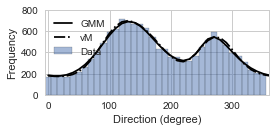

In [70]:
# 1. Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
density, _ = dir_hist(df['dir'], bins=arange(-5, 375, 10), density=True)

# 2. Caculate von Mises
y_vonmises = von_mises_mixture_pdf(x, dir_params)

# plot
plt.bar(arange(0, 360, 10), density*10*len(df['dir']), width=10, alpha=0.5, label='Data')
plot(x/pi*180, density_dir_expected*len(df['dir']) ,'-', color='black', label='GMM')
plot(x/pi*180, y_vonmises*2*pi/36*len(df['dir']), '-.', color='black', label='vM')
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print('Direction Distribution Comparison')
print(sector_r_square(density*10, density_dir_expected[:-1]))
print(sector_r_square(density*10, (y_vonmises*2*pi/36)[:-1]))

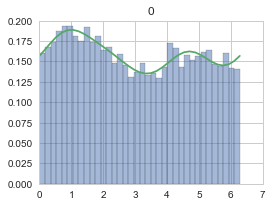

In [71]:
fig, ax = plt.subplots(figsize=(4,3))

x = linspace(0,2*pi, num=36+1)
y = von_mises_mixture_pdf(x, connection_params)
pd.DataFrame(phi_data).hist(bins=x, ax=ax, alpha=0.5, normed=True)
ax.plot(x, y, label='vonmises pdf')

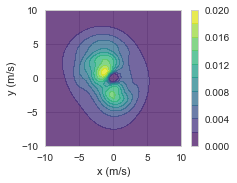

In [72]:
al_pdf = generate_al_pdf_from(kap_params, dir_params, connection_params, cartesian=True)

X = Y = PLOT_AXIS_RANGE
XX, YY=np.meshgrid(X,Y)
coords=np.array((XX.ravel(), YY.ravel())).T

x = [np.sqrt(x**2 + y**2) for x,y in coords]
alpha = [np.arctan2(y, x) for x,y in coords]
al_pdf_result = al_pdf(x, alpha)
al_Z = al_pdf_result.reshape(XX.shape)

fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,al_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [73]:
with np.errstate(divide='ignore'): # papermill has bugs
    display(gof_df(al_pdf_result, kde_result, BIN_WIDTH))

R_square    K_S Chi_square Chi_square_2       MSE RMSE / Max RMSE / Mean
0    0.528  0.187        inf          inf  0.000004      0.161       0.869

In [74]:
kap_params, dir_params, connection_params

(OrderedDict([('k', 0.22727218319573933),
              ('h', 0.48089925744158374),
              ('loc', 2.918616871899931),
              ('scale', 2.935757984755976)]),
 [[2.5835734982194762, 1.9931498523585609, 0.32344842520089123],
  [3.2978536141456587, -1.520052160324554, 0.26928885542092185],
  [1.1431286729349339, -0.045584811883169388, 0.15152088565010602],
  [2.3062028995178285, 2.9180240286262995, 0.2557418337280809]],
 [[0.85986587010430604, 2.3241838095223502, 0.30956696626236702],
  [1.0224854202815346, -1.5946149756401644, 0.35257116268090111],
  [1.1319146124067936, 0.75377598958612102, 0.33786187105673188]])

## 6.4 Sectoral Comaprison

### R square '

In [75]:
# %%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm_params, df, angle, incre, bin_width=BIN_WIDTH) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection, len(df)))

(6.7477001275082014, 9.9856394429041377e-05, 917.00519624385311, 6.6930344925672971, 0.8955192713754111, 0.90088873066232789)


In [76]:
# %%time
# al_density_collection=Parallel(n_jobs=-1)(delayed(al_direction_compare)(al_params, df, angle, incre, bin_width=BIN_WIDTH) 
#                                         for angle in arange(0, 360, incre))  
# print(true_R_square(al_density_collection, len(df)))

### Sectoral Compare

In [77]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
gmm_vals=Parallel(n_jobs=-1)(delayed(gmm_weibull_empirical_direction)(gmm_params, df, angle, rebinned_angle, BIN_WIDTH) 
                                for angle in arange(0, 360, rebinned_angle))  

Wall time: 15.3 s


In [78]:
%%time
y_als=Parallel(n_jobs=-1)(delayed(al_direction)(al_params, df, angle, rebinned_angle, BIN_WIDTH) 
                                    for angle in arange(0, 360, rebinned_angle))  

Wall time: 6min 34s


In [79]:
# Turn to parrallel would run 50% faster
# Calculate Speed Distribution
def model_data_comparison(df_standard, original_incre = 10, incre = 10, bin_width=1):
    start, end = 0, 360
    curve_collection = []
    max_speed = df_standard['speed'].max()
#     max_speed = ceil(df['speed'].quantile(.999))

    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df_standard, start, end, incre, bin_width)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        sub_df, bins, start_radian, end_radian, data_size = sub_df_at_angle(df_standard, angle, incre, bin_width)
        x = bins
        
        # 1. Fit Weibull, Empirical and GMM PDF, CDF
        gmm_val = [element for element in gmm_vals if element['angle'] == angle][0]
        density, y_ecdf = gmm_val['density'], gmm_val['y_ecdf']
        density_expected_gmm, y_cdf_gmm, direction_prob = gmm_val['density_expected_gmm'], gmm_val['y_cdf_gmm'], gmm_val['direction_prob']
        y_weibull, density_expected_weibull, y_cdf_weibull = gmm_val['y_weibull'], gmm_val['density_expected_weibull'], gmm_val['y_cdf_weibull']
        
        # 3. R square for GMM, Weibull
        R_square_gmm = sector_r_square(density, density_expected_gmm)                
        R_square_weibull = sector_r_square(density*bin_width, density_expected_weibull)

        # 4. K-S for GMM, Weibull
        cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
        
        # Makeup for Angular-Linear
        if 'y_als' in globals():
            al = [element for element in y_als if element['angle'] == angle][0]
            y_al, y_cdf_al = al['y_al'], al['y_cdf_al']
            R_square_al = sector_r_square(density, y_al)
            k_s_al =  np.abs(y_ecdf - y_cdf_al).max()
        else:
            R_square_al = None
            k_s_al = None
                
        # 5. Make Plots
        fig = plt.figure(figsize=(10,1.9))
        # 5.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=bins, alpha=0.5, label='Data')                  
        plot(bins[:-1]+BIN_WIDTH/2, density_expected_gmm*data_size*bin_width,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size*bin_width, '--', color='black',label='Weibull')   
        if 'y_als' in globals():
            ax1.plot(bins[:-1]+BIN_WIDTH/2, y_al*data_size*bin_width,'-.', color='black', label='AL')
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 5.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        if 'y_als' in globals():
            ax2.plot(x, y_cdf_al,'-.', color='black', label='AL')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        curves = {'direction': angle, 'datasize': data_size,  
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf,
                  'max_cdf_diff_gmm': cdf_diff.max(), 'max_cdf_diff_weibull': cdf_diff_weibull.max(),  'max_cdf_diff_al': k_s_al, 
                  'r_square_gmm': R_square_gmm, 'r_square_weibull': R_square_weibull, 'r_square_al': R_square_al}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s degree' % (angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull, R_square_al)
        print('max diff:', cdf_diff.max(), cdf_diff_weibull.max(), 
              'speed value:', x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()], 'y gmm', y_cdf_gmm[cdf_diff.argmax()])
        print(' ')
    return curve_collection

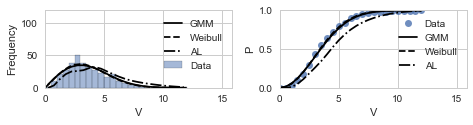

0 degree
data size: 340 weight 0.023274917853231106
GMM Weibull
R square 0.921483138943 0.937658405085 0.713817036378
max diff: 0.0461814397515 0.0335462591127 speed value: 3.5 3.5 y gmm 0.506759736719
 


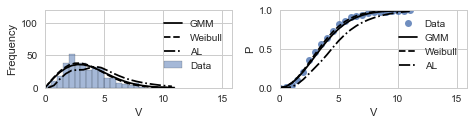

20 degree
data size: 355 weight 0.024301752464403067
GMM Weibull
R square 0.874202794482 0.897600686372 0.647214439742
max diff: 0.0623349378028 0.0382514358989 speed value: 5.0 1.5 y gmm 0.763017174873
 


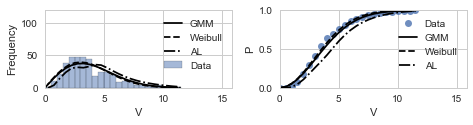

40 degree
data size: 398 weight 0.027245345016429355
GMM Weibull
R square 0.853433733235 0.879133726672 0.668178354257
max diff: 0.09472346957 0.064423230496 speed value: 4.0 4.0 y gmm 0.55351773646
 


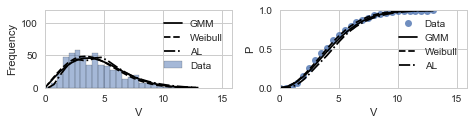

60 degree
data size: 537 weight 0.036760679079956185
GMM Weibull
R square 0.873354186586 0.902199908963 0.861464258965
max diff: 0.0659919813153 0.0337336878655 speed value: 3.5 3.5 y gmm 0.382797590379
 


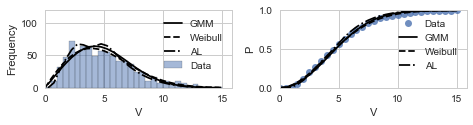

80 degree
data size: 811 weight 0.05551752464403067
GMM Weibull
R square 0.91054223973 0.93524733756 0.928468328999
max diff: 0.0441316582169 0.0272503573654 speed value: 4.0 4.0 y gmm 0.384968218479
 


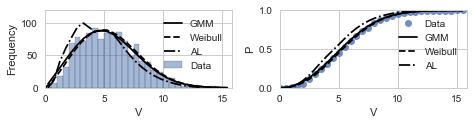

100 degree
data size: 1168 weight 0.07995618838992333
GMM Weibull
R square 0.956593774136 0.959817079878 0.8653959118
max diff: 0.0332132956364 0.0172801021941 speed value: 2.0 2.0 y gmm 0.0845831586501
 


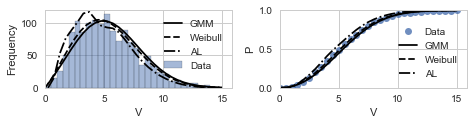

120 degree
data size: 1389 weight 0.09508488499452356
GMM Weibull
R square 0.932196216405 0.955954051702 0.909260747276
max diff: 0.0492840979021 0.0159445655439 speed value: 5.5 5.5 y gmm 0.521630228952
 


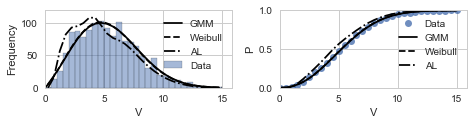

140 degree
data size: 1338 weight 0.09159364731653888
GMM Weibull
R square 0.954879773257 0.956640914551 0.887471938195
max diff: 0.0199988645484 0.0184443053178 speed value: 3.0 3.0 y gmm 0.180300089114
 


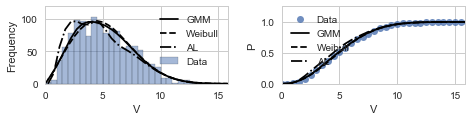

160 degree
data size: 1245 weight 0.08522727272727272
GMM Weibull
R square 0.960433356242 0.950304958 0.920728543979
max diff: 0.0179904256604 0.0254534154417 speed value: 7.5 3.5 y gmm 0.826022554174
 


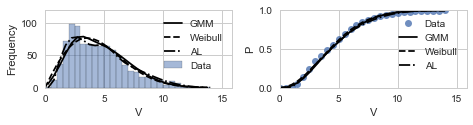

180 degree
data size: 926 weight 0.06338992332968237
GMM Weibull
R square 0.912634158879 0.896642052548 0.955798614283
max diff: 0.0621168400113 0.0460481716017 speed value: 3.0 3.0 y gmm 0.281295686987
 


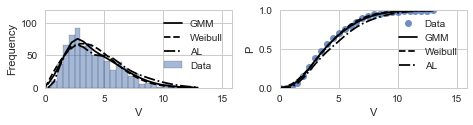

200 degree
data size: 740 weight 0.05065717415115006
GMM Weibull
R square 0.947617680229 0.895885175666 0.896998009464
max diff: 0.0365168011581 0.0438051440653 speed value: 3.0 3.0 y gmm 0.354023739382
 


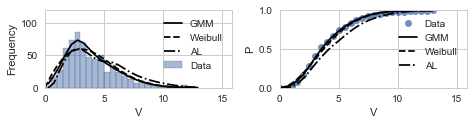

220 degree
data size: 647 weight 0.0442907995618839
GMM Weibull
R square 0.950995793005 0.87456513187 0.856951419286
max diff: 0.0265244215299 0.0594913872059 speed value: 3.5 3.5 y gmm 0.497432301809
 


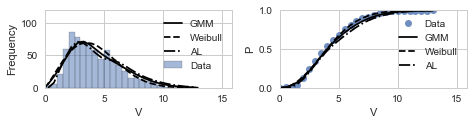

240 degree
data size: 737 weight 0.050451807228915665
GMM Weibull
R square 0.918793357895 0.90216226109 0.92555308364
max diff: 0.0454028731182 0.0406588379319 speed value: 6.0 1.5 y gmm 0.770065240857
 


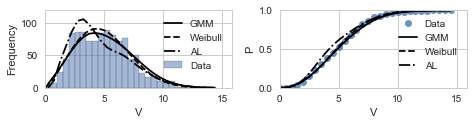

260 degree
data size: 1076 weight 0.07365826944140197
GMM Weibull
R square 0.927837439931 0.933579374672 0.849740851055
max diff: 0.0392741100201 0.0266175334596 speed value: 7.0 3.5 y gmm 0.78228722827
 


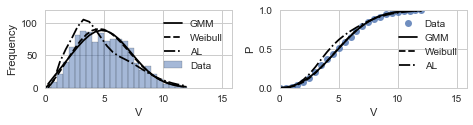

280 degree
data size: 1058 weight 0.07242606790799562
GMM Weibull
R square 0.929048056546 0.938916490437 0.803711027536
max diff: 0.0297896709064 0.0276446208183 speed value: 4.0 4.0 y gmm 0.341665905653
 


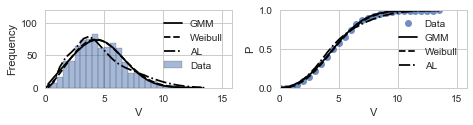

300 degree
data size: 804 weight 0.055038335158817085
GMM Weibull
R square 0.956975677315 0.965683980041 0.900693479023
max diff: 0.0301585122536 0.0175617132795 speed value: 2.5 4.5 y gmm 0.165730651557
 


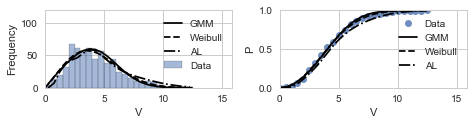

320 degree
data size: 612 weight 0.041894852135815994
GMM Weibull
R square 0.901175356738 0.920686665978 0.879406213285
max diff: 0.0308741031231 0.0308579973214 speed value: 8.0 2.0 y gmm 0.970416586783
 


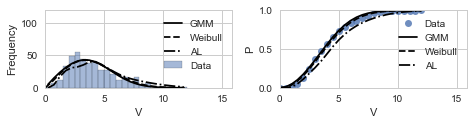

340 degree
data size: 427 weight 0.029230558598028478
GMM Weibull
R square 0.882254094502 0.890124344092 0.8033090356
max diff: 0.054464989423 0.0404001165017 speed value: 1.5 3.5 y gmm 0.103645317292
 
Wall time: 8.88 s


In [80]:
%%time
curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle, BIN_WIDTH)

[0.9292142706329494, 0.9299121793439119, 0.8705449681232705]


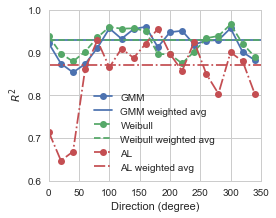

In [81]:
diff_df = pd.DataFrame(curve_collection) 

vals = [{'name': 'GMM', 'value': diff_df.r_square_gmm},
        {'name': 'Weibull', 'value': diff_df.r_square_weibull}]
if 'y_als' in globals():
    vals.append({'name': 'AL', 'value': diff_df.r_square_al})
means = plot_sectoral_comparison(vals, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.7)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(means)

[0.039601965271063924, 0.03020232396164082, 0.09656063944606931]


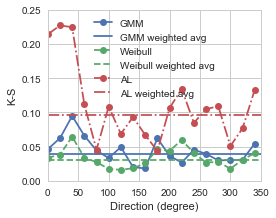

In [82]:
vals = [{'name': 'GMM', 'value': diff_df.max_cdf_diff_gmm},
        {'name': 'Weibull', 'value': diff_df.max_cdf_diff_weibull},]
if 'y_als' in globals():
    vals.append({'name': 'AL', 'value': diff_df.max_cdf_diff_al})
means = plot_sectoral_comparison(vals, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(means)

## Nonstationary Cross validation

# 7. Energy Evaluation

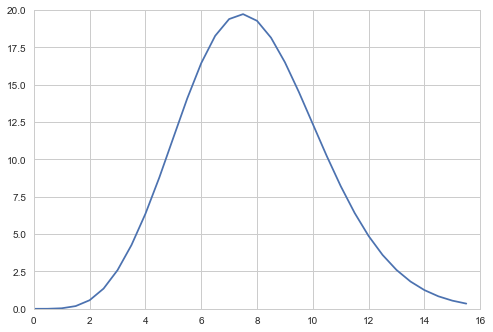

In [83]:
x = arange(0, max_speed, 0.5)
y_ =[]
for x_ in x:
    def sub_f(theta, V=x_):
        return 0.5*1.225*V**3*(mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V
    y_.append(integrate.nquad(sub_f, [[0, 2*pi]]))
y = array(list(zip(*y_))[0])
plot(x, y)

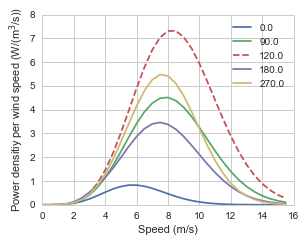

In [84]:
for degree in [0, 90, 120, 180, 270]:
    rad = np.deg2rad(degree)
    x = arange(0, max_speed, 0.5)
    y = [0.5*1.225*x_**3*f(x_, rad) for x_ in x]
    line_style = '-' if degree not in [120] else '--'
    plot(x, y, line_style, label=rad/pi*180)
plt_configure(legend=True, 
              xlabel='Speed'+speed_unit_text, ylabel='Power densitiy per wind speed'+speed_power_density_unit, 
              figsize=(4.5,3.5))

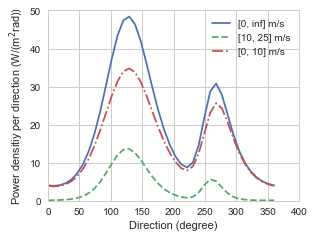

In [85]:
for integrate_interval, line_style in zip([[0, inf], [10, 25], [0,10]],  ['-', '--', '-.']):
    rads = linspace(0,2*pi, num=40)
    y_ =[]
    for rad in rads:
        def sub_f(V,theta=rad):
            return 0.5*1.225*V**3*(mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V
        y_.append(integrate.nquad(sub_f, [integrate_interval]))
    y = array(list(zip(*y_))[0])
    plot(rads/pi*180, y, line_style, label=str(integrate_interval)+bare_speed_unit_text)
plt_configure(legend=True, 
              xlabel='Direction'+dir_unit_text, ylabel='Power densitiy per direction'+dir_power_density_unit, 
              figsize=(4.5,3.5))

# 7. Result Variability & Cross-Validation

In [86]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
print(bandwidth, FIT_METHOD)

config = create_gmm_config(bandwidth, FITTING_RANGE, FIT_LIMIT, BIN_WIDTH, KDE_KERNEL, FIT_METHOD)

0.8 square_error


## 7.1  Result Variability

In [87]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, NUMBER_OF_GAUSSIAN, config) for i in range(20))         

Wall time: 50.4 s


number of estimated clusters : 3


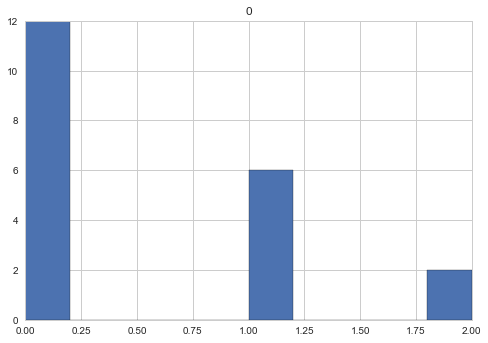

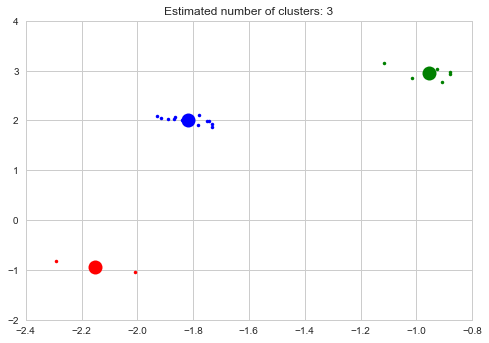

In [88]:
from sklearn.cluster import MeanShift, estimate_bandwidth

X = []
for result in results:
    X.append(result['gmm'][0][0:3])
X= np.asarray(X)

# The following bandwidth can be automatically detected
ms_bandwidth = estimate_bandwidth(X)
ms = MeanShift(bandwidth=ms_bandwidth, bin_seeding=True)
ms.fit(X)

labels, cluster_centers = ms.labels_, ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

print("number of estimated clusters : %d" % n_clusters_)
pd.DataFrame(ms.labels_).hist()
plt.show()

from itertools import cycle

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 1], X[my_members, 2], col + '.')
    plt.plot(cluster_center[1], cluster_center[2], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)

for result, label in zip(results, ms.labels_) :
    result['cluster_num']=label

Cluster Number: 0


weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.681  -1.865   2.073  3.237  3.326  -0.023
2  0.275   0.930  -3.740  2.456  2.784   0.276
3  0.044  -1.911  -1.138  1.017  1.648  -0.481

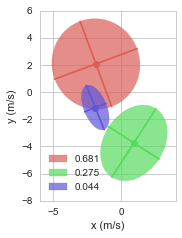

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.988  0.011      0.125    55203.827  1.030779e-07      0.025       0.137

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.990  0.014      0.081    20092.865  9.012368e-08      0.024       0.128

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.714  -1.742   1.982  3.282  3.404  -0.024
2  0.236   1.095  -4.007  2.459  2.800   0.346
3  0.050  -1.838  -1.346  1.071  1.711  -0.515

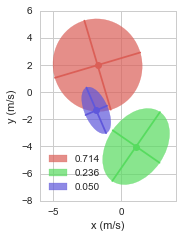

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.990  0.008      0.080     3348.766  8.524905e-08      0.023       0.125

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.990  0.009      0.082    18460.212  9.096403e-08      0.024       0.129

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.712  -1.783   1.905  3.179  3.435  -0.028
2  0.249   1.177  -3.857  2.417  2.698   0.334
3  0.039  -1.837  -1.280  1.009  1.503  -0.457

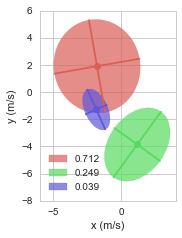

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.990  0.012      0.114    59749.826  8.484540e-08      0.023       0.124

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.989  0.015      0.090    27220.296  9.499254e-08      0.024       0.132

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.695  -1.930   2.081  3.231  3.422  -0.016
2  0.255   1.026  -3.717  2.479  2.865   0.336
3  0.050  -1.707  -1.579  1.189  1.750  -0.537

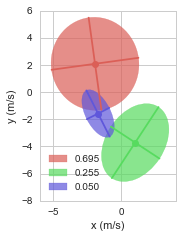

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.990  0.011      0.125    61025.519  8.858625e-08      0.025       0.127

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.989  0.012      0.092    30574.710  9.556799e-08      0.024       0.132

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.696  -1.868   2.031  3.310  3.500  -0.025
2  0.252   1.014  -3.886  2.441  2.686   0.247
3  0.052  -1.892  -1.022  1.011  1.922  -0.392

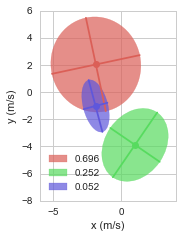

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.990  0.010      0.058     4833.691  8.476151e-08      0.024       0.124

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.989  0.012      0.061     7497.331  9.484031e-08      0.024       0.132


Cluster Number: 1


weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.429  -0.880   2.969  2.788  3.058  -0.187
2  0.420  -1.948  -1.076  3.289  3.550  -0.577
3  0.151   1.236  -3.520  2.760  2.911   0.547

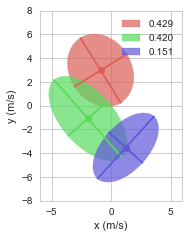

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.983  0.012      0.203    75518.701  1.524851e-07      0.031       0.167

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.982  0.013      0.159    26780.877  1.587388e-07      0.032       0.170

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.452  -0.879   2.939  2.856  3.281  -0.217
2  0.399  -2.159  -1.011  3.041  3.364  -0.577
3  0.148   1.722  -3.681  2.728  3.403   0.594

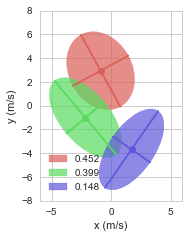

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.982  0.013      0.218    80358.591  1.573716e-07      0.030       0.169

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.982  0.014      0.351   575065.555  1.560551e-07      0.031       0.169

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.449  -0.927   3.031  2.828  3.102  -0.198
2  0.362  -2.232  -1.022  3.197  3.403  -0.620
3  0.189   1.242  -3.666  2.986  3.138   0.443

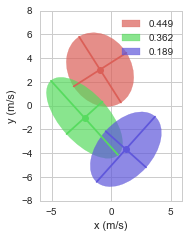

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.980  0.012      0.166     8689.943  1.717874e-07      0.032       0.177

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.983  0.012      0.149     7989.370  1.515729e-07      0.031       0.166

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.479  -0.908   2.770  2.893  3.194  -0.246
2  0.348  -2.388  -1.070  2.960  3.456  -0.604
3  0.173   1.449  -3.756  2.817  3.258   0.524

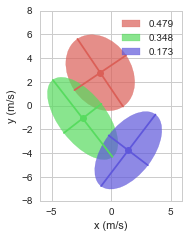

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.983  0.012      0.352   156939.373  1.464043e-07      0.030       0.164

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.982  0.014      0.257    68373.282  1.541102e-07      0.031       0.168

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.471  -1.017   2.858  2.828  3.120  -0.193
2  0.347  -2.336  -1.144  3.205  3.522  -0.628
3  0.182   1.373  -3.604  2.807  3.236   0.539

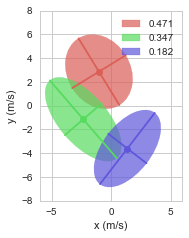

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.983  0.011      0.214    43420.815  1.452354e-07      0.031       0.162

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.983  0.010      0.199    44153.771  1.520846e-07      0.031       0.167


Cluster Number: 2


weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.450  -2.292  -0.819  2.944  3.521  -0.584
2  0.386  -0.617   3.254  2.710  3.154  -0.259
3  0.165   1.736  -3.410  2.742  3.474   0.575

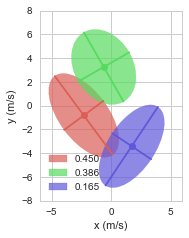

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.985  0.014      0.457   687020.206  1.311185e-07      0.028       0.155

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.982  0.016      0.387   467601.587  1.585379e-07      0.032       0.170

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.440  -2.010  -1.050  3.206  3.690  -0.577
2  0.412  -0.910   3.027  2.793  3.041  -0.159
3  0.148   1.562  -3.333  2.670  2.879   0.557

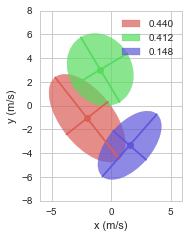

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.981  0.012      0.377   256181.557  1.663532e-07      0.033       0.174

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.983  0.012      0.206   101731.364  1.522717e-07      0.031       0.167

In [89]:
for cluster_num in arange(0, n_clusters_):
    print('Cluster Number:', cluster_num)
    display_num = 0
    for result in results:
        if result['cluster_num'] == cluster_num:
            display_num = display_num+1
            display(pretty_print_gmm(result['gmm']))
            fig,ax = plt.subplots(figsize=(3.5,3.5))
            plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
            plt.show()

            display(gof_df(result['gmm_pdf_result'], result['kde_result'], BIN_WIDTH))
            display(gof_df(result['gmm_pdf_result'], kde_result, BIN_WIDTH))
            print('')
        if display_num == 5:
            break

## 7.2 Cross-validation, to select the number of Gaussian

In [92]:
%%time
from sklearn.model_selection import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 5
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(n_splits=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf.split(df))                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

Number of train/test dataset 11686.4 2921.6
  
Number of gaussian 1
Train


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.142018   2468.211830  0.022795  3.000848e-07    0.043680     0.233895   
1    0.145393   2909.963268  0.020156  2.864859e-07    0.042542     0.228684   
2    0.146147   3198.783363  0.022772  3.049765e-07    0.043502     0.235822   
3    0.136434   1827.541784  0.022722  2.728833e-07    0.041481     0.223086   
4    0.143103   2940.295128  0.021801  2.826749e-07    0.041557     0.227056   

   R_square  
0  0.965818  
1  0.967269  
2  0.965113  
3  0.968951  
4  0.967972

Test


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.195616   5300.263969  0.027405  3.041403e-07    0.041819     0.235748   
1    0.231173   7606.849203  0.027742  3.887501e-07    0.048399     0.265832   
2    0.199283   1927.589833  0.032032  3.318842e-07    0.046104     0.246148   
3    0.204978   7396.918199  0.023682  4.197002e-07    0.050419     0.276720   
4    0.229750   5974.076364  0.038828  3.969337e-07    0.051185     0.269096   

   R_square  
0  0.965526  
1  0.956591  
2  0.963193  
3  0.952247  
4  0.954125

  
Number of gaussian 2
Train


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.079388   1936.425121  0.014016  1.943904e-07    0.034348     0.188118   
1    0.071213   1926.784644  0.012977  1.812268e-07    0.034203     0.181765   
2    0.073307   1283.967179  0.014960  1.899950e-07    0.034604     0.186260   
3    0.085115   3247.846046  0.013918  1.927555e-07    0.035019     0.187439   
4    0.076767   2464.152610  0.014469  1.935646e-07    0.034341     0.188072   

   R_square  
0  0.977892  
1  0.979469  
2  0.978151  
3  0.977929  
4  0.978106

Test


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.133391   5579.702145  0.014367  2.624761e-07    0.039100     0.219627   
1    0.171699   6075.674323  0.029798  3.271324e-07    0.042509     0.244497   
2    0.160451  11392.367277  0.028562  2.634097e-07    0.038796     0.218690   
3    0.110176   1564.533554  0.019063  2.531816e-07    0.038649     0.215178   
4    0.175042   2400.315067  0.038976  3.169323e-07    0.047224     0.239523   

   R_square  
0  0.970152  
1  0.962215  
2  0.971239  
3  0.971904  
4  0.963296

  
Number of gaussian 3
Train


Chi_square   Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.203196   89115.515393  0.010858  1.499225e-07    0.030201     0.165303   
1    0.089838   30853.590339  0.010820  9.083333e-08    0.023908     0.128771   
2    0.250706  160648.318635  0.010807  1.388364e-07    0.029390     0.159159   
3    0.094820   26850.655855  0.011061  9.570711e-08    0.024594     0.132058   
4    0.064280    7036.945950  0.008456  8.003304e-08    0.022498     0.120844   

   R_square  
0  0.982990  
1  0.989694  
2  0.984212  
3  0.989125  
4  0.990764

Test


Chi_square   Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.359209  113964.748999  0.017442  2.054701e-07    0.037766     0.193862   
1    0.148300    5904.982223  0.019181  1.702753e-07    0.031329     0.175912   
2    0.170570    2830.201130  0.011958  2.559522e-07    0.039264     0.215909   
3    0.100311    3450.834975  0.015248  1.220496e-07    0.027011     0.149488   
4    0.195429   79830.234216  0.012236  2.292014e-07    0.034756     0.204290   

   R_square  
0  0.976343  
1  0.980442  
2  0.970824  
3  0.986030  
4  0.975391

  
Number of gaussian 4
Train


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.115533  86960.686806  0.006964  4.953309e-08    0.017791     0.095029   
1    0.065377  27265.724696  0.006330  5.140288e-08    0.018332     0.096761   
2    0.096766  73199.636129  0.006747  4.189970e-08    0.016096     0.087481   
3    0.072292   5702.619574  0.005945  5.201390e-08    0.017843     0.097393   
4    0.078103  44491.518174  0.007000  5.385089e-08    0.018142     0.099131   

   R_square  
0  0.994361  
1  0.994122  
2  0.995244  
3  0.994101  
4  0.993835

Test


Chi_square   Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.130353    4377.027165  0.021055  1.716295e-07    0.031157     0.177082   
1    0.163281   14486.540780  0.012595  1.289288e-07    0.026217     0.153762   
2    0.114413    6120.085076  0.019244  1.701683e-07    0.033402     0.175674   
3    0.367303  731004.152414  0.012659  1.252233e-07    0.029009     0.151176   
4    0.195118    6304.346079  0.027931  1.839376e-07    0.032846     0.182972   

   R_square  
0  0.980603  
1  0.985627  
2  0.980482  
3  0.985582  
4  0.979706

  
Number of gaussian 5
Train


Chi_square   Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.072950    4867.358530  0.005684  3.413452e-08    0.014503     0.078873   
1    0.054204   16097.113981  0.006514  3.126765e-08    0.014089     0.075504   
2    0.134889   61320.961799  0.011333  3.745278e-08    0.015097     0.082708   
3    0.181536  195193.277777  0.011904  3.956092e-08    0.015886     0.084922   
4    0.148102   73838.783369  0.008161  3.022142e-08    0.013837     0.074254   

   R_square  
0  0.996160  
1  0.996431  
2  0.995692  
3  0.995467  
4  0.996573

Test


Chi_square   Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.234338   45051.435433  0.016087  1.470564e-07    0.030834     0.164033   
1    0.081373     910.423301  0.012788  1.475412e-07    0.029389     0.164164   
2    0.203390  181557.344142  0.022219  1.295661e-07    0.029108     0.153297   
3    0.311263  216991.667073  0.013174  1.352883e-07    0.028106     0.157246   
4    0.180064   40713.444412  0.014167  1.401473e-07    0.028820     0.159792   

   R_square  
0  0.982505  
1  0.983499  
2  0.985878  
3  0.985064  
4  0.983831

Wall time: 1min 48s


In [93]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
1    0.142619   2668.959075  0.022049  2.894211e-07    0.042552     0.229708   
2    0.077158   2171.835120  0.014068  1.903865e-07    0.034503     0.186331   
3    0.140568  62901.005234  0.010401  1.110665e-07    0.026118     0.141227   
4    0.085614  47524.037076  0.006597  4.974009e-08    0.017641     0.095159   
5    0.118336  70263.499091  0.008719  3.452746e-08    0.014682     0.079252   

   R_square  
1  0.967025  
2  0.978309  
3  0.987357  
4  0.994333  
5  0.996065

Test gof mean, std


Chi_square   Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
1    0.212160    5641.139513  0.029938  3.682817e-07    0.047585     0.258709   
2    0.150152    5402.518473  0.026153  2.846264e-07    0.041256     0.227503   
3    0.194764   41196.200308  0.015213  1.965897e-07    0.034025     0.187892   
4    0.194094  152458.430303  0.018697  1.559775e-07    0.030526     0.168133   
5    0.202086   97044.862872  0.015687  1.399199e-07    0.029251     0.159706   

   R_square  
1  0.958336  
2  0.967761  
3  0.977806  
4  0.982400  
5  0.984155

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


R_square


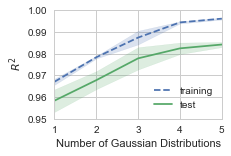

K_S


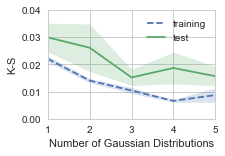

Chi_square


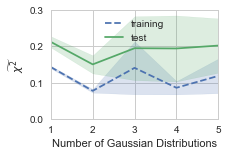

MSE


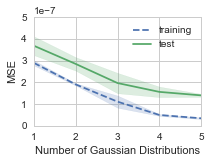

In [94]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square','MSE'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $","MSE"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

In [95]:
# for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
#     display(fig)

In [96]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = 'D:/output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)

48.75N98.25W
